# Zeitbezogene Analysen

Das studentische Verhalten wird nachfolgend in zeitlicher Hinsicht betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [6410]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [6411]:
sns.set_theme(style='white', font_scale=1.2, palette='Set2_r')

# Definition einer Liste von Farben für Gesamtbetrachtungen
color_general = '#5FA4D2'

# Definition einer Liste von Farben für die Studiengänge
colors_studies = ['#dac29e', '#e5c94a', '#a2c865', '#da96bf', '#94a3c2']

### Herstellung der Verbindung zur MySQL-Datenbank

In [6412]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Selektion auf Studenten**

In [6413]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student' OR relateduserstatus = 'student'"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

courseid Studiengang  userid userstatus  relateduserid  \
0              0           0       1    student             -2   
1            629           1      13    student             -2   
2              0           0      -2      other             24   
3              0           0      -2      other              1   
4              0           0       1    student             -2   
...          ...         ...     ...        ...            ...   
333768     28512           3     109    student            109   
333769     28512           3     109    student              0   
333770         0           0     109    student            109   
333771     28514           3     109    student              0   
333772         0           0     109    student              0   

       relateduserstatus     action  \
0                  other       sent   
1                  other     viewed   
2                student       sent   
3                student       sent   
4                  other       sent   
...                  ...        ...   
333768           student    deleted   
333769             other     viewed   
333770           student     viewed   
333771             other     viewed   
333772             other  loggedout   

                                               eventname  \
0                          \core\event\notification_sent   
1                        \core\event\user_profile_viewed   
2                          \core\event\notification_sent   
3                          \core\event\notification_sent   
4                          \core\event\notification_sent   
...                                                  ...   
333768  \mod_forum\event\discussion_subscription_deleted   
333769                         \core\event\course_viewed   
333770                      \core\event\dashboard_viewed   
333771                         \core\event\course_viewed   
333772                        \core\event\user_loggedout   

                  objecttable  objectid         timecreated  \
0               notifications   3232247 2020-10-12 04:54:03   
1                        user      3837 2020-10-17 09:00:11   
2               notifications   3281851 2020-10-18 14:27:05   
3               notifications   3281852 2020-10-18 14:27:05   
4               notifications   3290921 2020-10-19 15:54:03   
...                       ...       ...                 ...   
333768  forum_discussion_subs     45244 2021-06-03 21:11:35   
333769                                0 2021-06-03 21:12:09   
333770                                0 2021-06-03 21:13:25   
333771                                0 2021-06-03 21:13:36   
333772                   user     40298 2021-06-03 21:16:15   

       course_module_type  instanceid  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                   ...         ...  
333768                              0  
333769                              0  
333770                              0  
333771                              0  
333772                              0  

[333773 rows x 13 columns]

### Verteilung der Log-Einträge im Gesamtzeitraum

In [6414]:
# Ausgabe statistischer Werte für das Tabellenmerkmal timecreated
display(moodle_data.timecreated.describe(datetime_is_numeric=True))  # Daten müssen für diese Ausgabe als datetime typisiert sein.

count                           333773
mean     2021-01-28 01:46:20.956416512
min                2020-10-12 03:54:58
25%                2020-11-30 10:42:54
50%                2021-01-22 14:14:32
75%                2021-03-25 11:43:13
max                2021-06-03 22:38:39
Name: timecreated, dtype: object

**Ergebnis:** Nur ca. die Hälfte aller Log-Einträge werden innerhalb der Vorlesungszeit bis kurz vor Beginn des Prüfungszeitraums I protokolliert. Ziemlich genau bis zum Ende des Prüfungszeitraums II werden 75 Prozent aller Log-Einträge festgestellt. 25 Prozent entfallen auf das anschließende Sommersemester 2021.

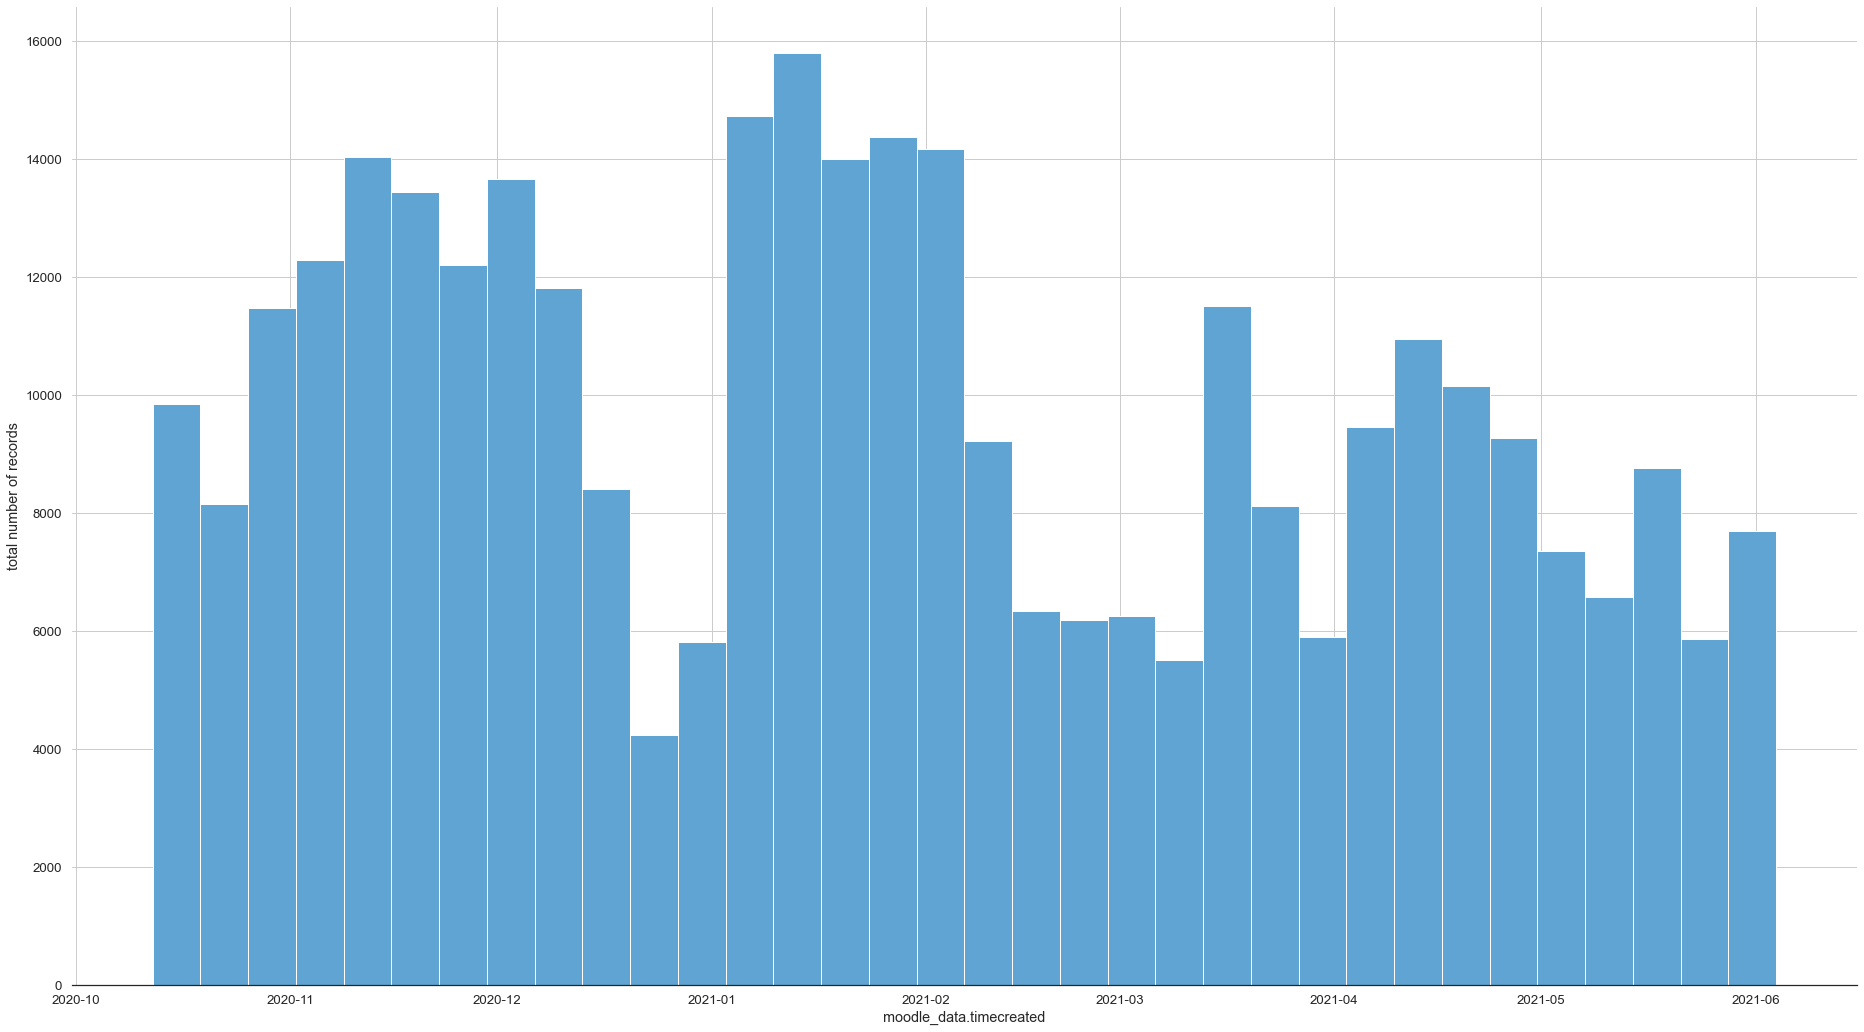

In [6415]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 18)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über 8 Monate (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated, bins=8, color=colors_overview, alpha=1)

# Visualisierung der Menge der Log-Einträge über 34 Wochen (Gesamtzeitraum)
chart = sns.histplot(data=moodle_data.timecreated, bins=34, color=color_general, alpha=1)

# Visualisierung der Menge der Log-Einträge über 235 Tage (Gesamtzeitraum)
# chart = sns.histplot(data=moodle_data.timecreated, bins=235, color=colors_overview, alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Tag.pdf', format='pdf')
plt.show()

**Ergebnis der Betrachtung des Tages-/Wochen-Histogramms:** Bemerkenswert sind die starken Anstiege und hohen Zahlen zu Mitte November, zu Beginn des neuen Jahres, zu Zeiten der Prüfungen (Prüfungszeitraum I und II) und zu Beginn des Sommersemesters. Die Minima sind wie erwartet um die Weihnachtszeit, zwischen den Prüfungszeiträumen und vor Beginn des Sommersemesters deutlich sichtbar. Fraglich ist allerdings, warum im Mai die Zahlen abfallen und nicht ähnlich stark ansteigen, wie etwa im November. Es wäre zu erwarten, dass im zweiten Monat des Semesters die Aktivitäten zunehmen sollten (dieser Umstand erscheint bezüglich der Betrachtung von Benutzertypen wenig relevant).

### Verteilung der Log-Einträge pro Wochentag

&nbsp;
**Wochentag pro Log-Eintrag**

In [6416]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

0         0
85877     0
85876     0
85875     0
85874     0
         ..
36836     6
36835     6
36834     6
36842     6
259180    6
Name: timecreated, Length: 333773, dtype: int64

&nbsp;
**Menge der Log-Einträge pro Wochentag**

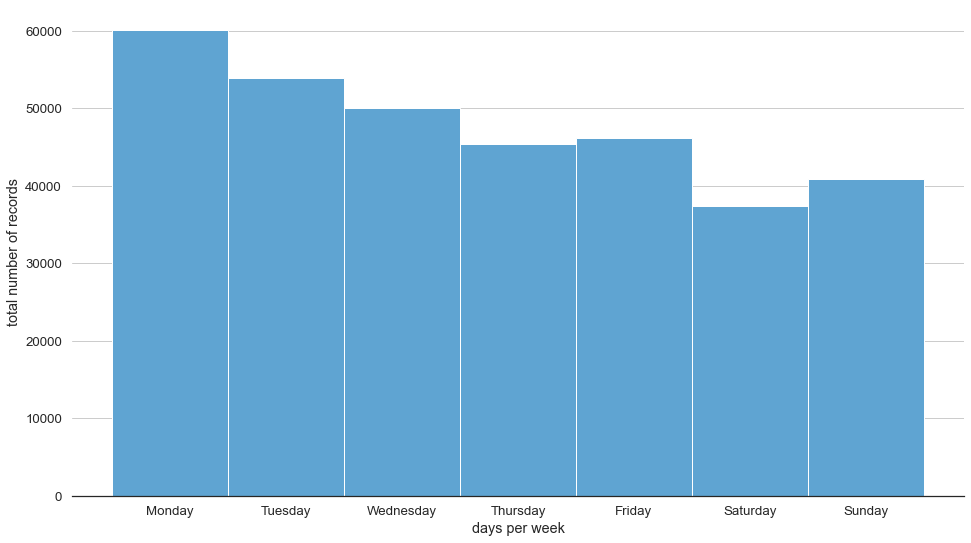

In [6417]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color=color_general, alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Studiengang**

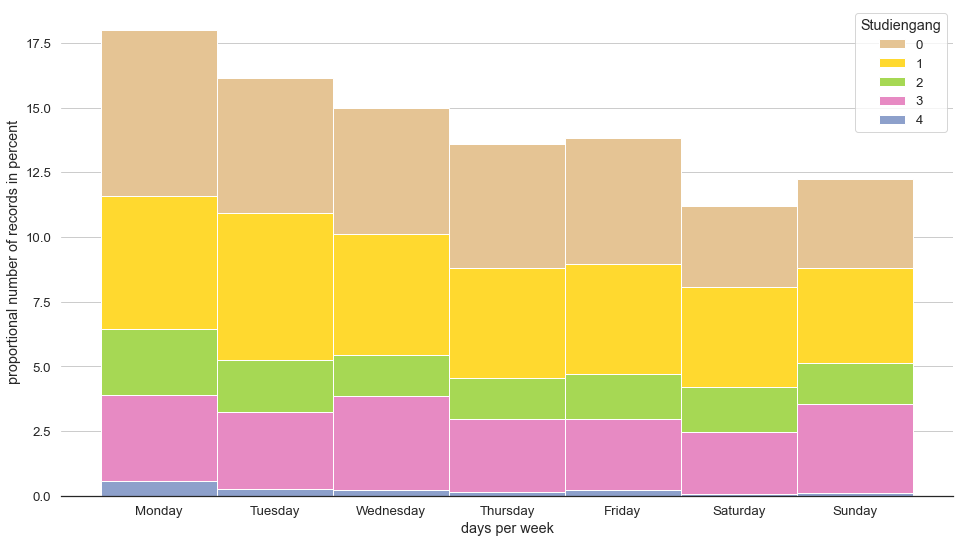

In [6418]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.histplot(x=moodle_data.timecreated.dt.weekday, bins=7, discrete=True, stat="percent", hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Der Rückgang der unter der Woche vergleichsweise hohen Mengen an Log-Einträgen im Studiengang 0 fällt deutlich stärker aus, als der Rückgang der Aktivitäten in den Fachkursen. Dies könnte auf ein unterschiedliches Kommunikationsverhalten an Arbeitstagen und an Wochenenden hindeuten. In jedem Fall beeinflusst der Rückgang im Studiengang 0 das Gesamtergebnis deutlich. Studenten im Studiengang 3 sind an Sonntagen relativ betrachtet wesentlich aktiver als andere.

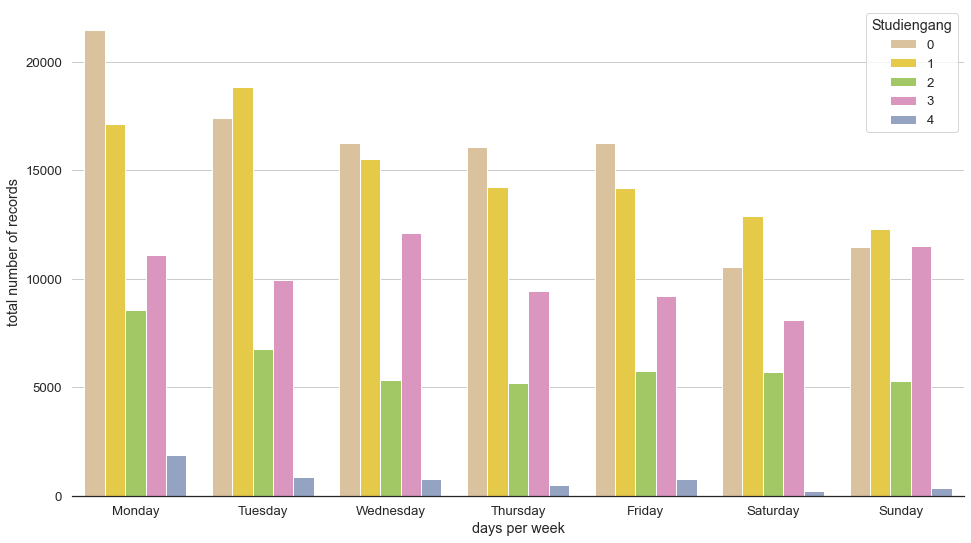

In [6419]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.legend(title='studies', loc='upper right', labels=['0', '1', '2', '3', '4'])
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge über alle Wochentage**

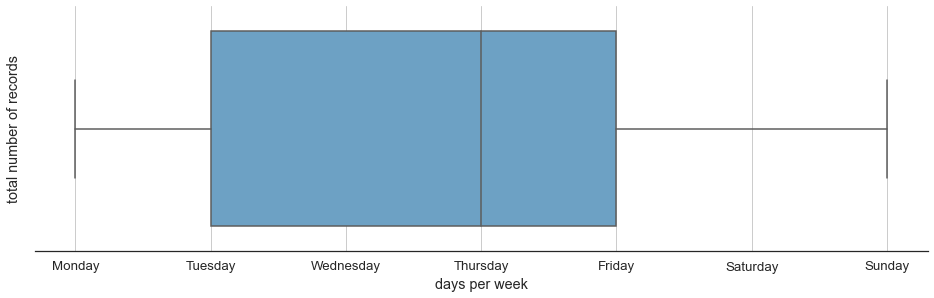

In [6420]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 4.5))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über alle Wochentage
chart = sns.boxplot(x=days_per_week, orient='h', color=color_general)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number of records')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Die Benutzeraktivitäten orientierten sich weitgehend an einer normalen Arbeitswoche, die Hälfte aller Interaktionen wurde im Zeitraum von Dienstag bis Freitag verzeichnet. Montags wurden vergleichsweise viele Aktivitäten festgestellt. Insbesondere die Studenten im Studiengang 4 haben an Montagen gearbeitet, und im Verlaufe des Dienstags bereits die Hälfte ihrer Arbeit erledigt. An den Wochenenden wurde überraschenderweise nur wenig gearbeitet. Hier waren dann die Studenten im Studiengang 3 wieder etwas aktiver als andere in den anderen Studiengängen.

&nbsp;
**Menge der Log-Einträge pro Studiengang über alle Wochentage**

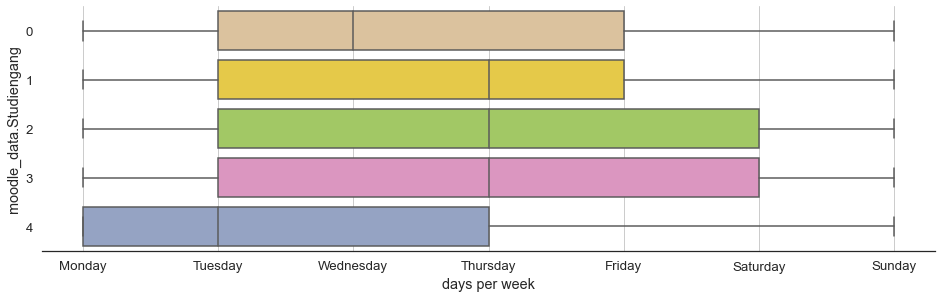

In [6421]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(16, 4.5))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über alle Wochentage und Studiengang
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.Studiengang')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student im Studiengang 0**

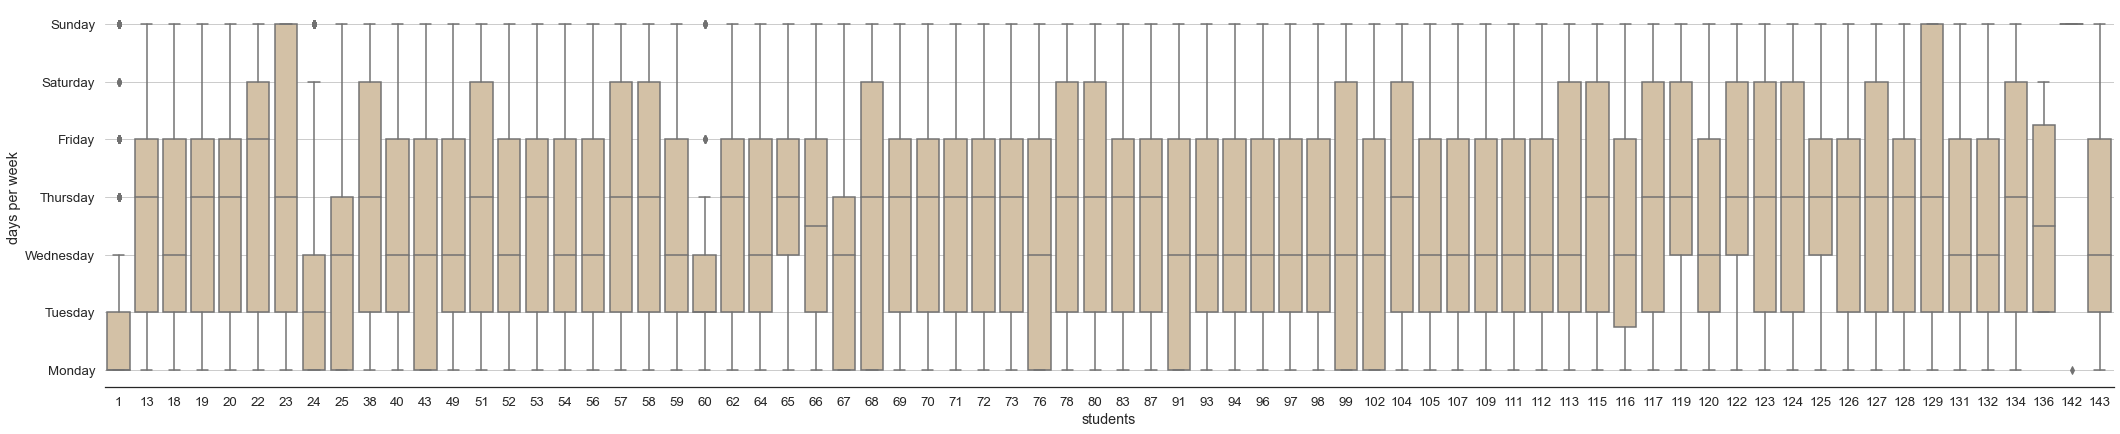

In [6422]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '0')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 0
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '0')], y=days_per_week, color=colors_studies[0])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student im Studiengang 1**

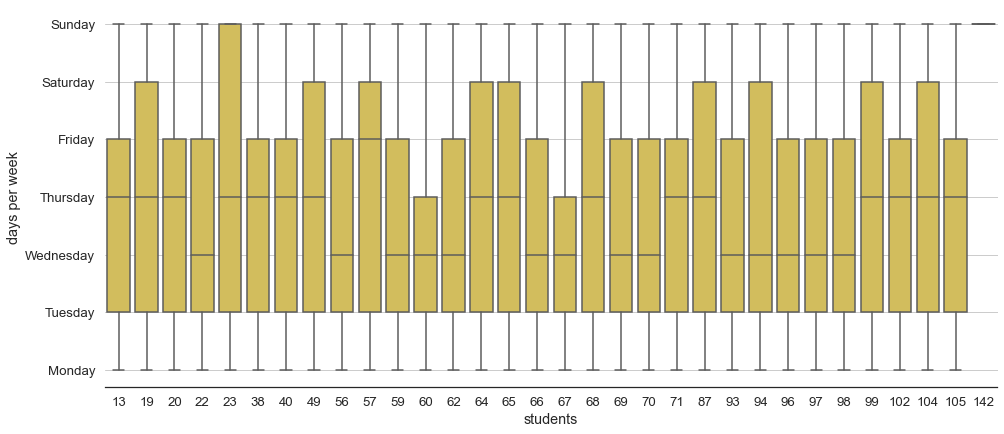

In [6423]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '1')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 1
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '1')], y=days_per_week, color=colors_studies[1])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student im Studiengang 2**

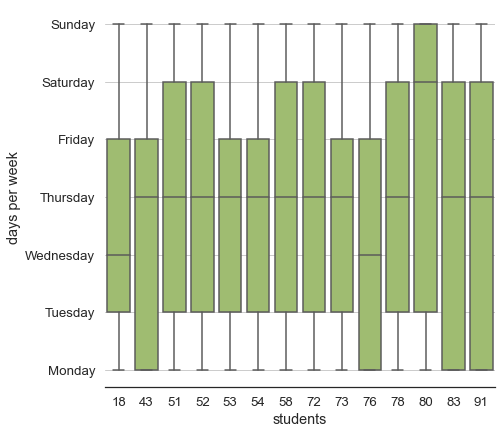

In [6424]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '2')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 2
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '2')], y=days_per_week, color=colors_studies[2])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student im Studiengang 3**

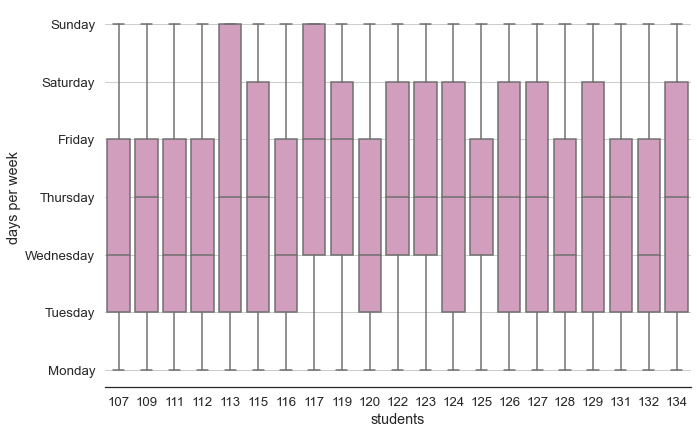

In [6425]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '3')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 3
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '3')], y=days_per_week, color=colors_studies[3])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student im Studiengang 4**

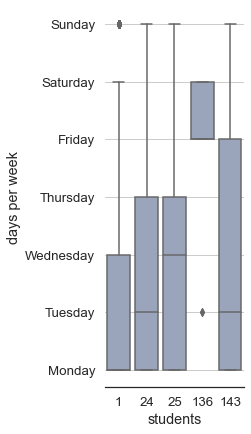

In [6426]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '4')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 4
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang == '4')], y=days_per_week, color=colors_studies[4])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Student in verschiedenen Studiengängen**

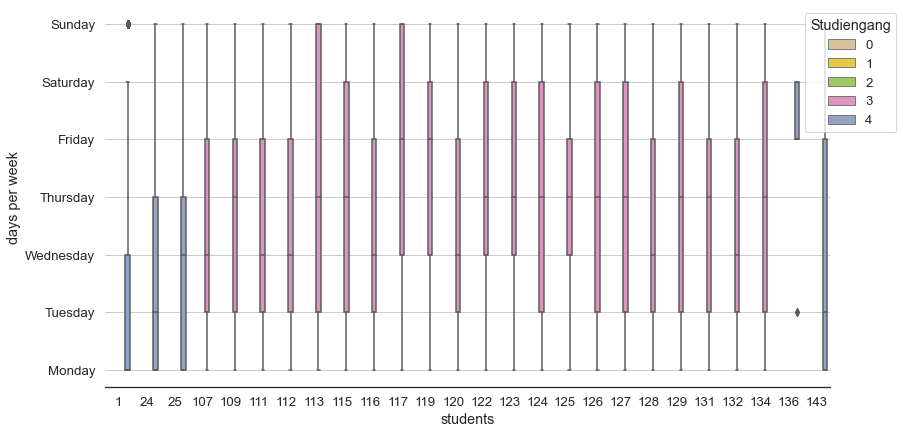

In [6427]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=((moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang > '2')].nunique() / 2), 7))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Student im Studiengang 3
chart = sns.boxplot(x=moodle_data.userid[(moodle_data.userstatus == 'student') & (moodle_data.Studiengang > '2')], y=days_per_week, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
plt.legend(title='Studiengang', bbox_to_anchor=[1.1, 1], loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Actions ohne Personenbezug**

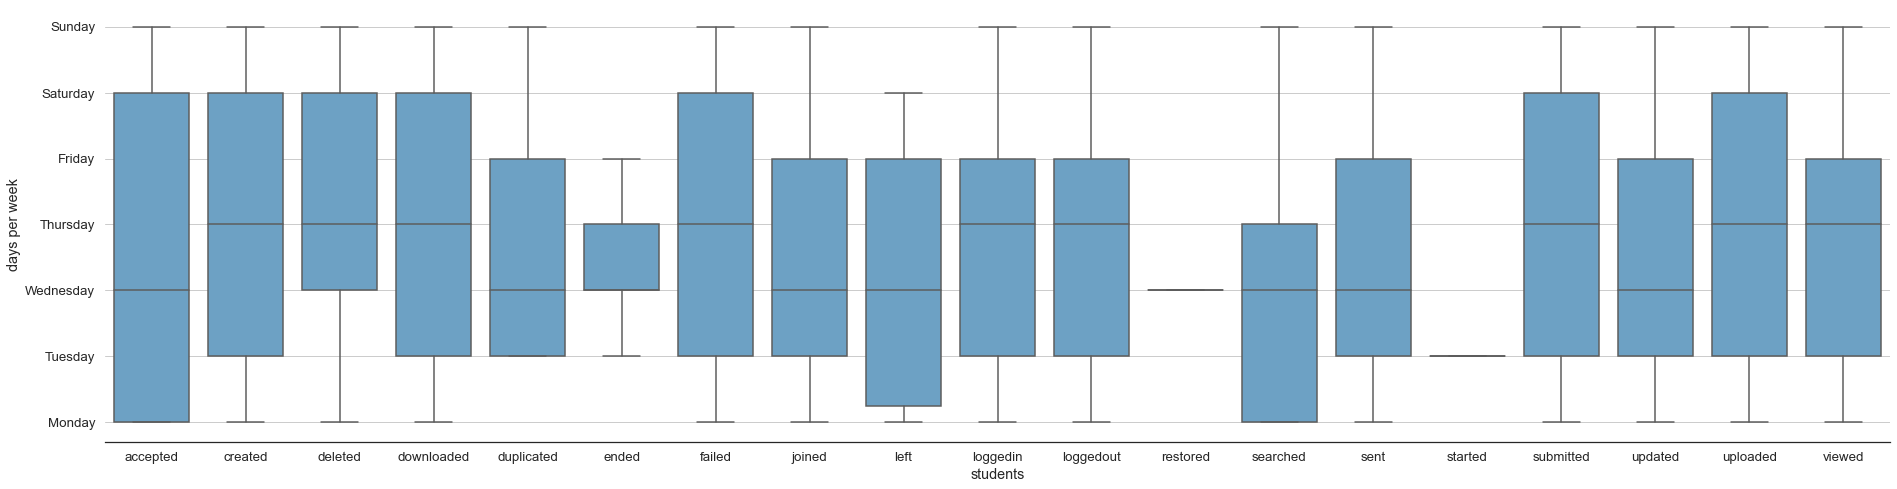

In [6428]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Actions ohne Personenbezug
chart = sns.boxplot(x=moodle_data.action[(moodle_data.userstatus == 'student') & (moodle_data.relateduserid == 0)].sort_values(), y=days_per_week, color=color_general)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Wochentag und Actions mit Personenbezug**

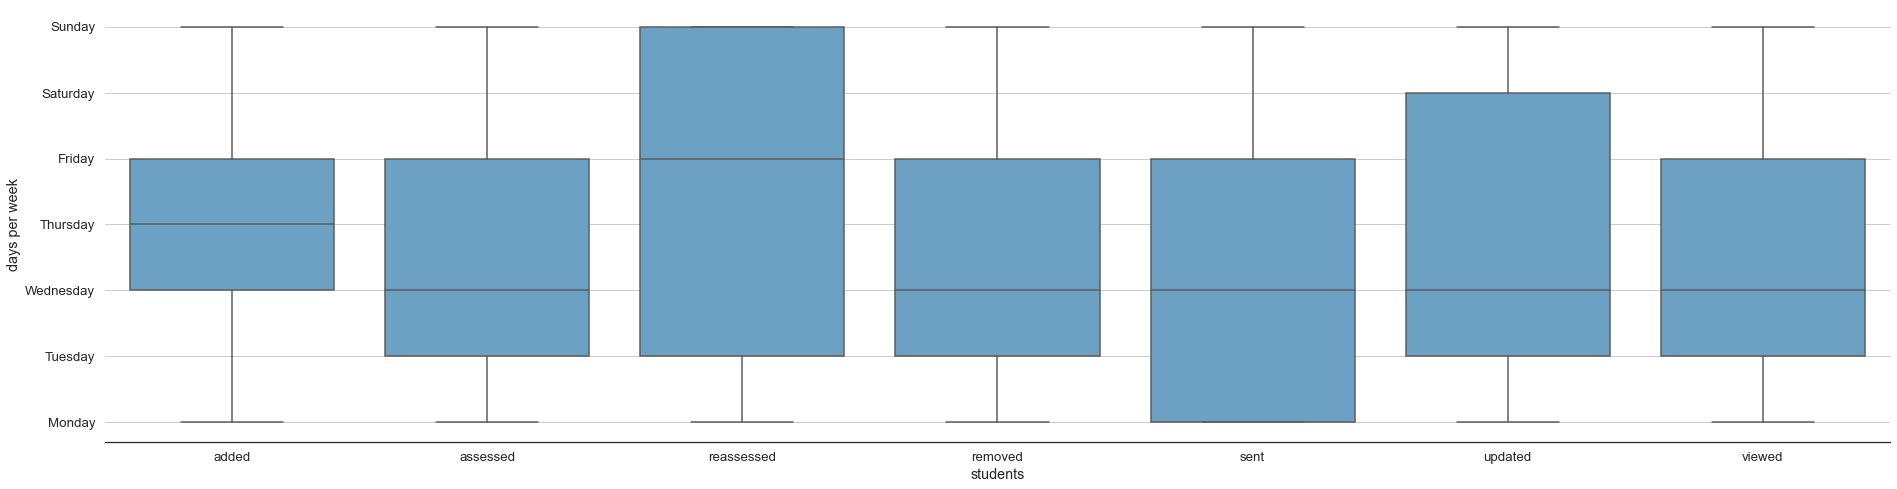

In [6429]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Wochentag und Actions ohne Personenbezug
chart = sns.boxplot(x=moodle_data.action[(moodle_data.userstatus == 'student') & (moodle_data.relateduserid != 0) & (moodle_data.userid != moodle_data.relateduserid)].sort_values(), y=days_per_week, color=color_general)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.yaxis.set_ticks(range(0, 7, 1))
chart.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('students')
chart.set_ylabel('days per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Tagesstunde

&nbsp;
**Tagesstunde pro Log-Eintrag**

In [6430]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

112723     0
200807     0
200808     0
200809     0
200810     0
          ..
232972    23
232971    23
232970    23
232978    23
244347    23
Name: timecreated, Length: 333773, dtype: int64

&nbsp;
**Menge der Log-Einträge pro Tagesstunde**

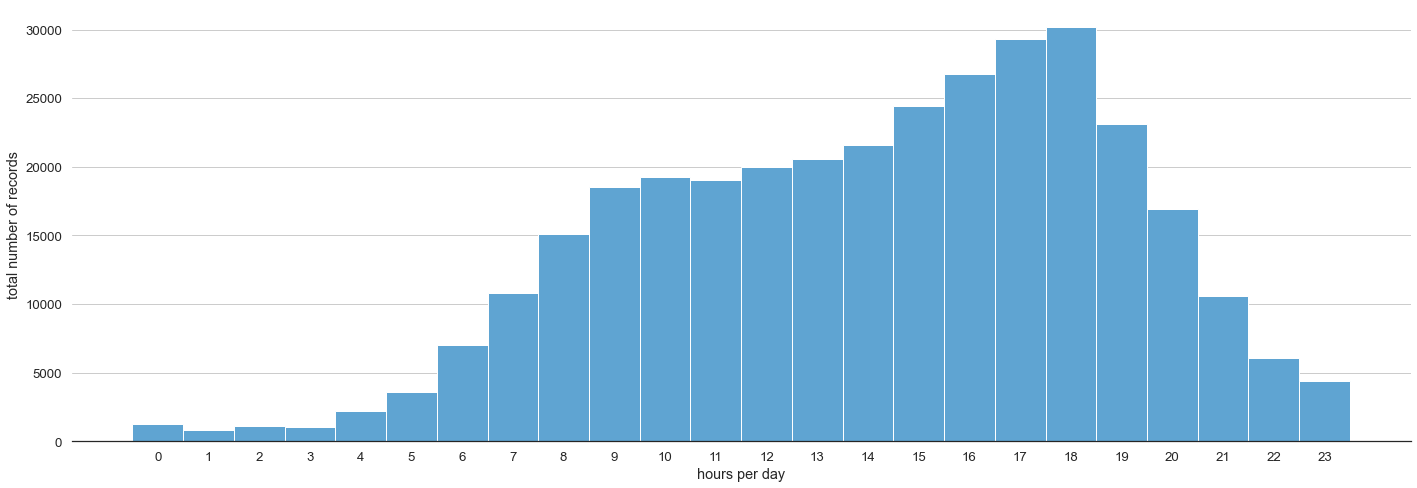

In [6431]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color=color_general, alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Tagesstunde und Studiengang**

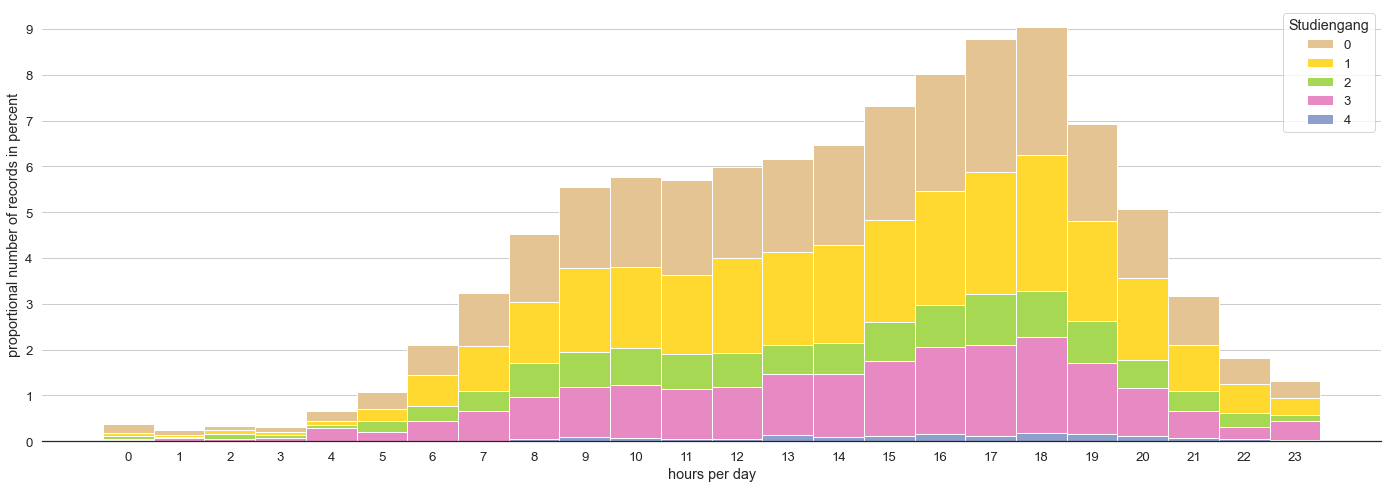

In [6432]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.histplot(x=moodle_data.timecreated.dt.hour, bins=24, discrete=True, stat="percent", hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], multiple="stack", alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records in percent')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.yaxis.set_major_locator(ticker.MultipleLocator(1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

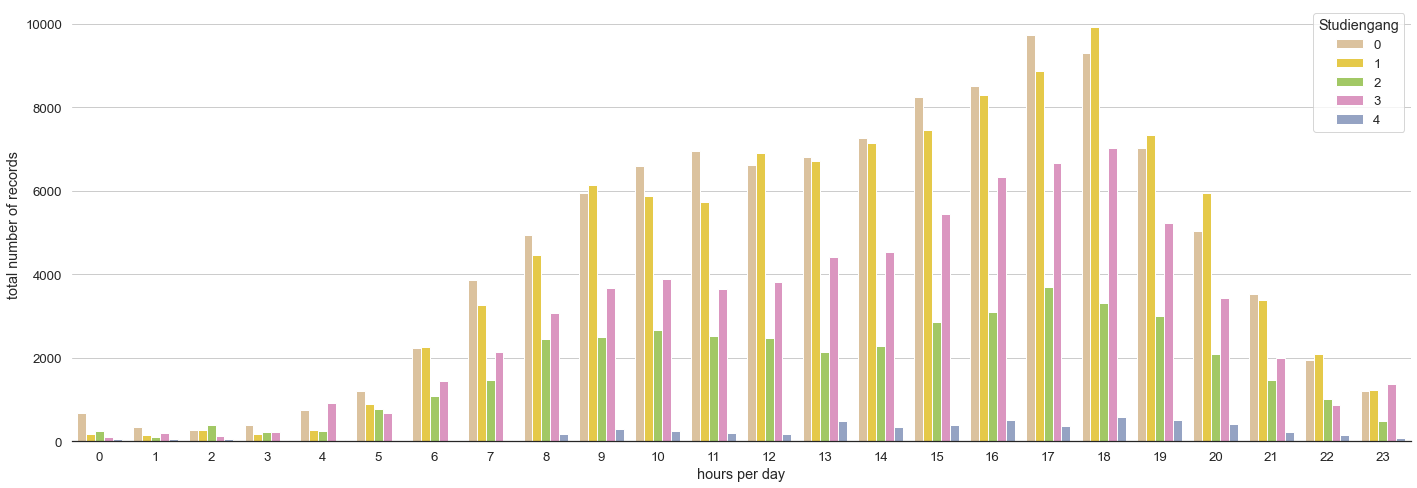

In [6433]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge über alle Tagesstunden**

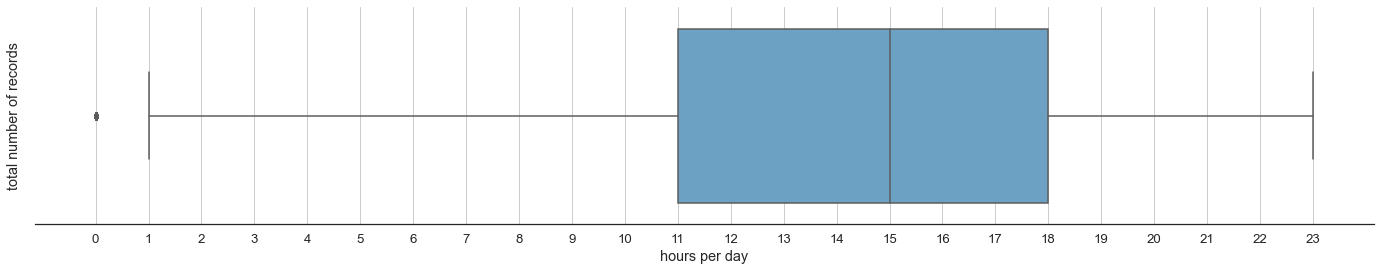

In [6434]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 4))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, orient='h', color=color_general)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number of records')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Die Benutzeraktivitäten orientierten sich weitgehend an einem normalen Arbeitstag, die Hälfte aller Interaktionen wurden im Zeitraum von 11 bis 19 Uhr verzeichnet. Vor 9 Uhr wurden vergleichsweise nur wenig Aktivitäten festgestellt. Ab 19 Uhr nahm die Menge an protokollierten Interaktionen überraschenderweise deutlich ab.

&nbsp;
**Menge der Log-Einträge über alle Tagesstunden pro Studiengang**

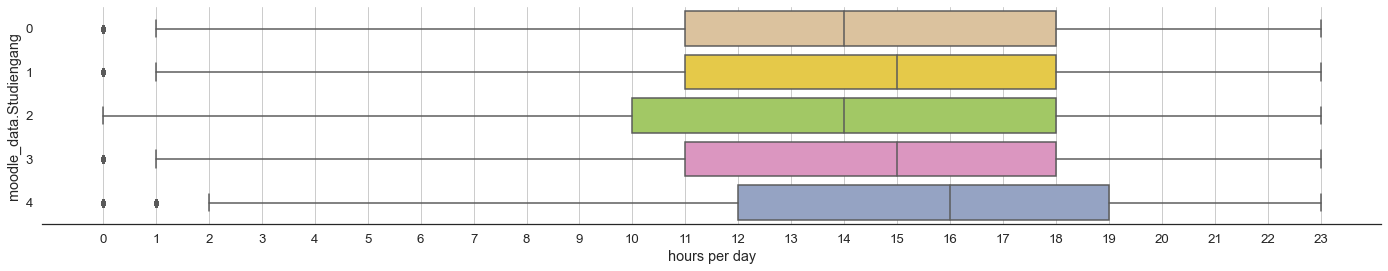

In [6435]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 4))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über alle Tagesstunden pro Studiengang
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=['0', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.Studiengang')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Student

&nbsp;
**Log-Einträge pro Student**

In [6436]:
# In der Auswahl enthalten sind nur Studenten, die selbst eine Aktivität initiiert haben.
users = moodle_data.userid[moodle_data.userstatus == 'student'].groupby(moodle_data.userid).count()
display(users)

userid
1      3865
13     4330
18     1978
19     5823
20     5909
       ... 
132    2973
134    4629
136      33
142      10
143    1387
Name: userid, Length: 72, dtype: int64

&nbsp;
**Menge der Log-Einträge pro Student über alle Tagesstunden**

Gegenstand der Betrachtung sind Datensätze, bei denen die Aktivität von Studenten initiiert wurde (userstatus == 'student') oder bei denen ein Student mit einer Aktivität einer anderen Person in Beziehung stand (relateduserstatus == 'student'). Ungeachtet dessen, werden die Ergebnisse hier immer nur für identifizierte Studenten angezeigt.

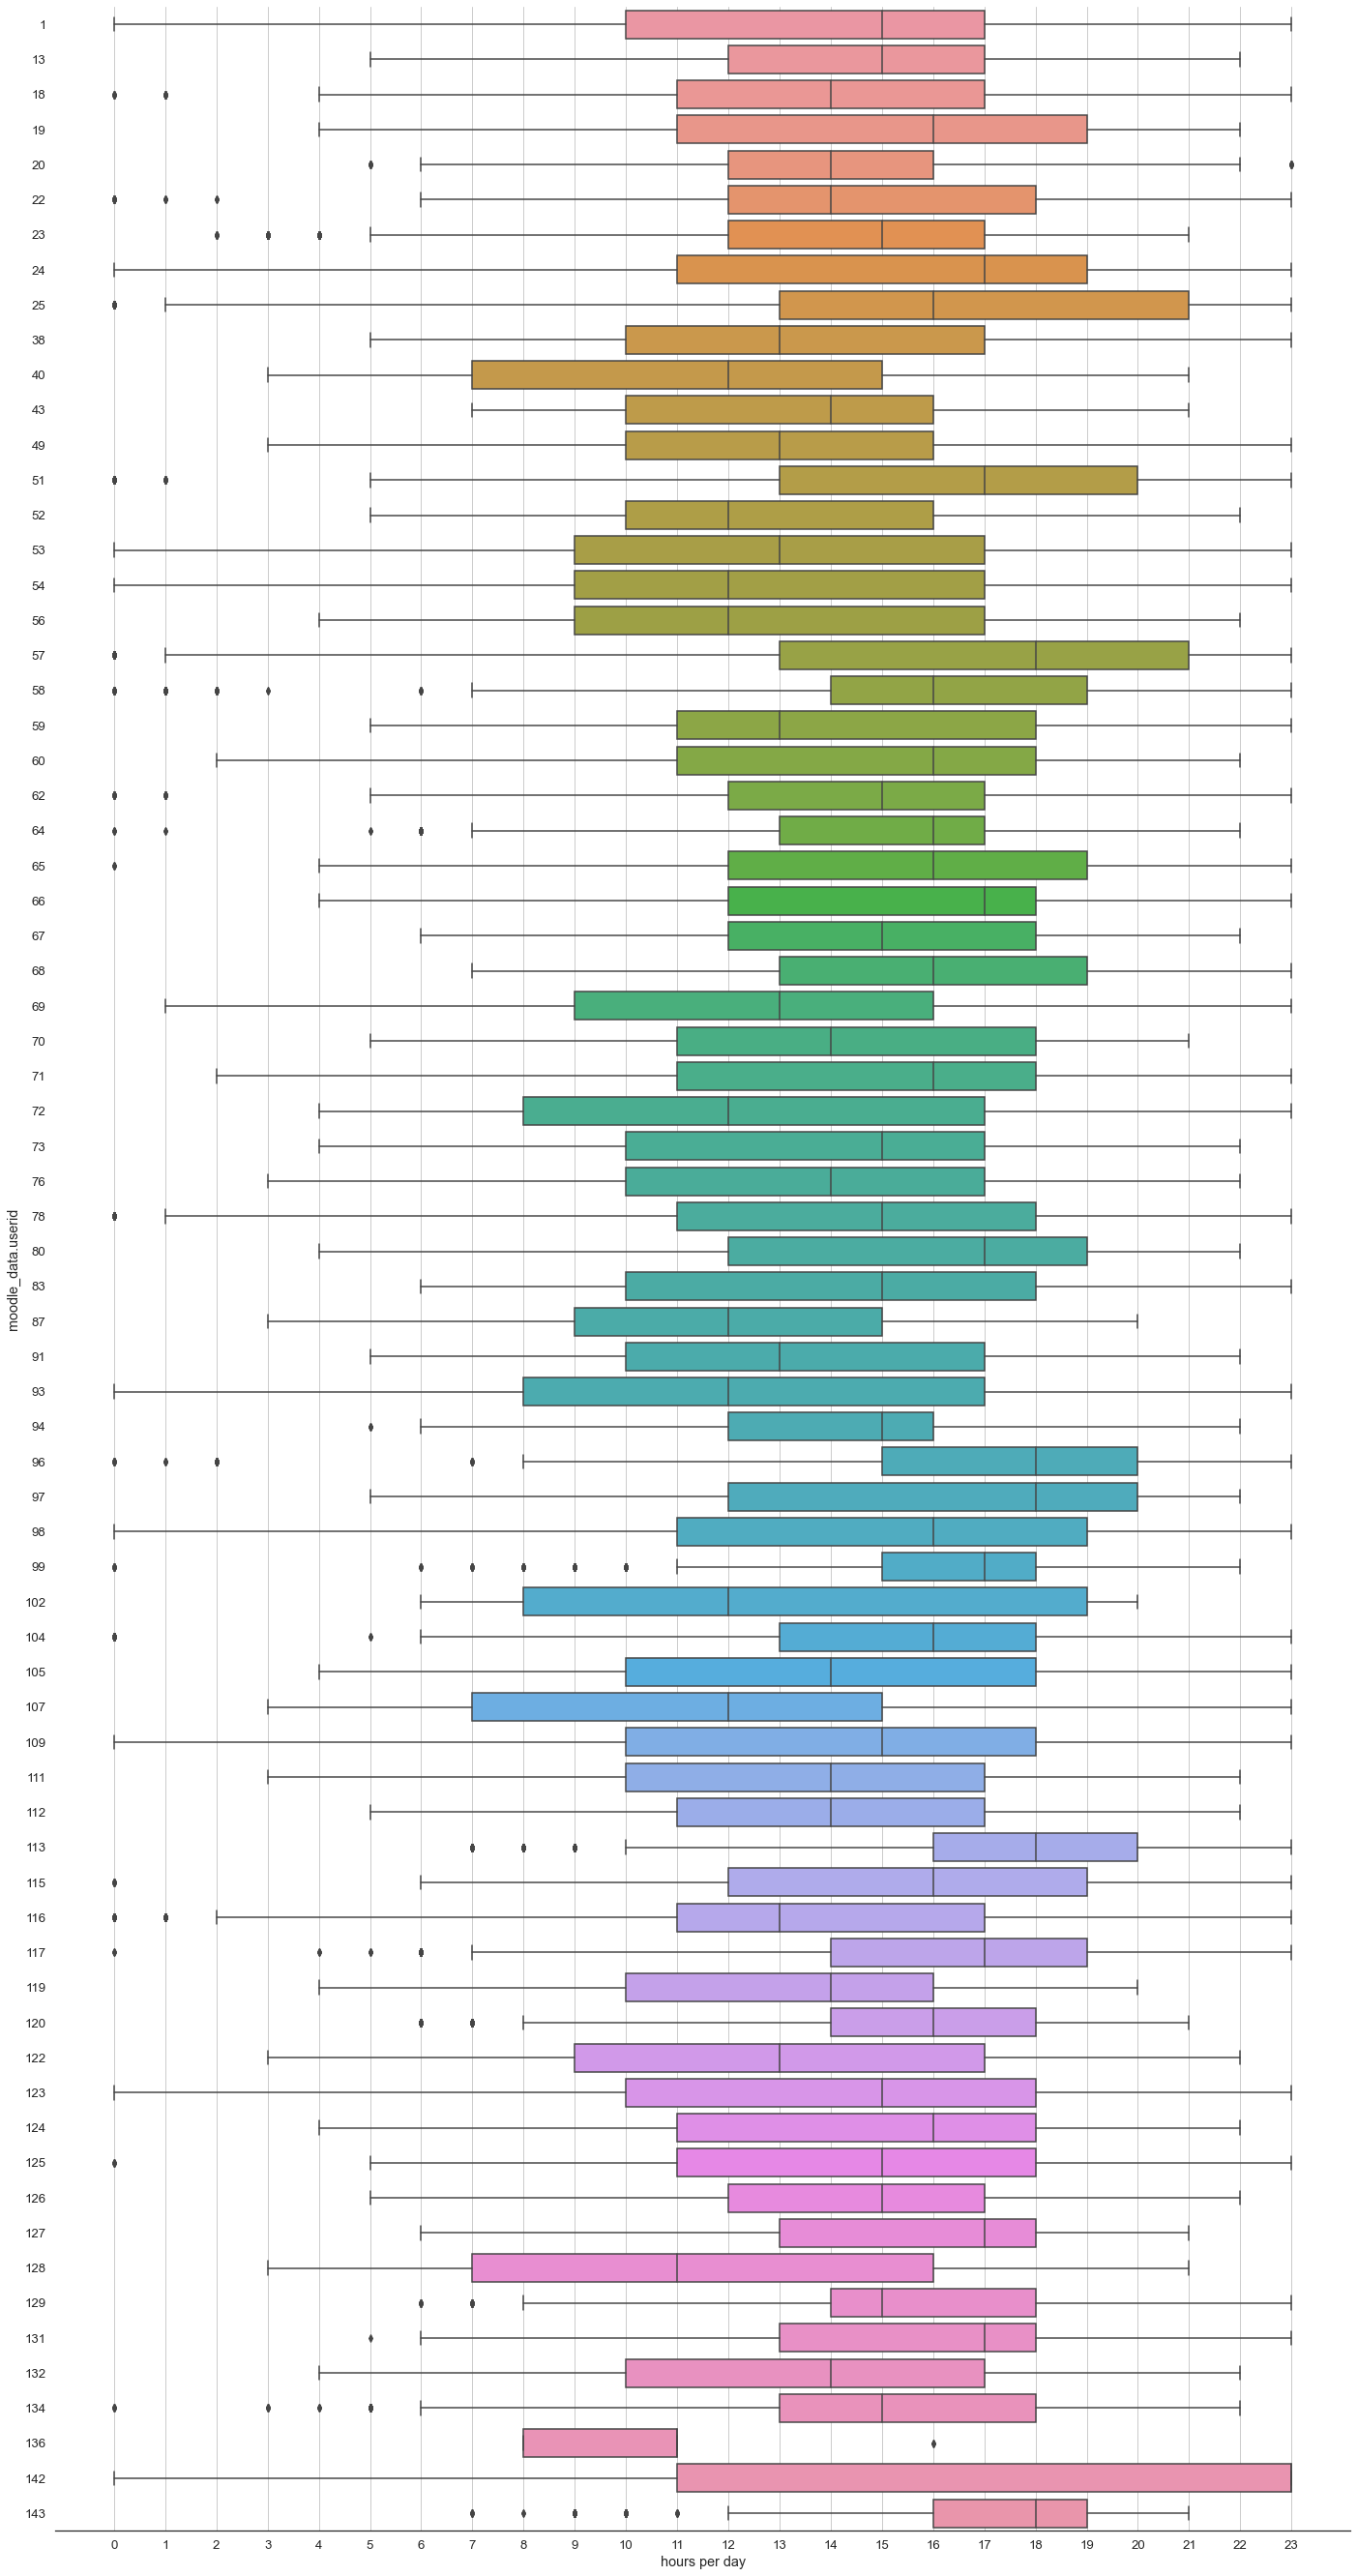

In [6437]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 48))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Student über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.userid, orient='h', order=users.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Es gibt ein paar Studenten, für in nur drei bis vier Stunden eines Tages die Hälfte der Aktivitäten verzeichnet werden. In der Regel sind die Aktivitäten mit oft acht Stunden oder mehr aber wesentlich breiter gestreut.

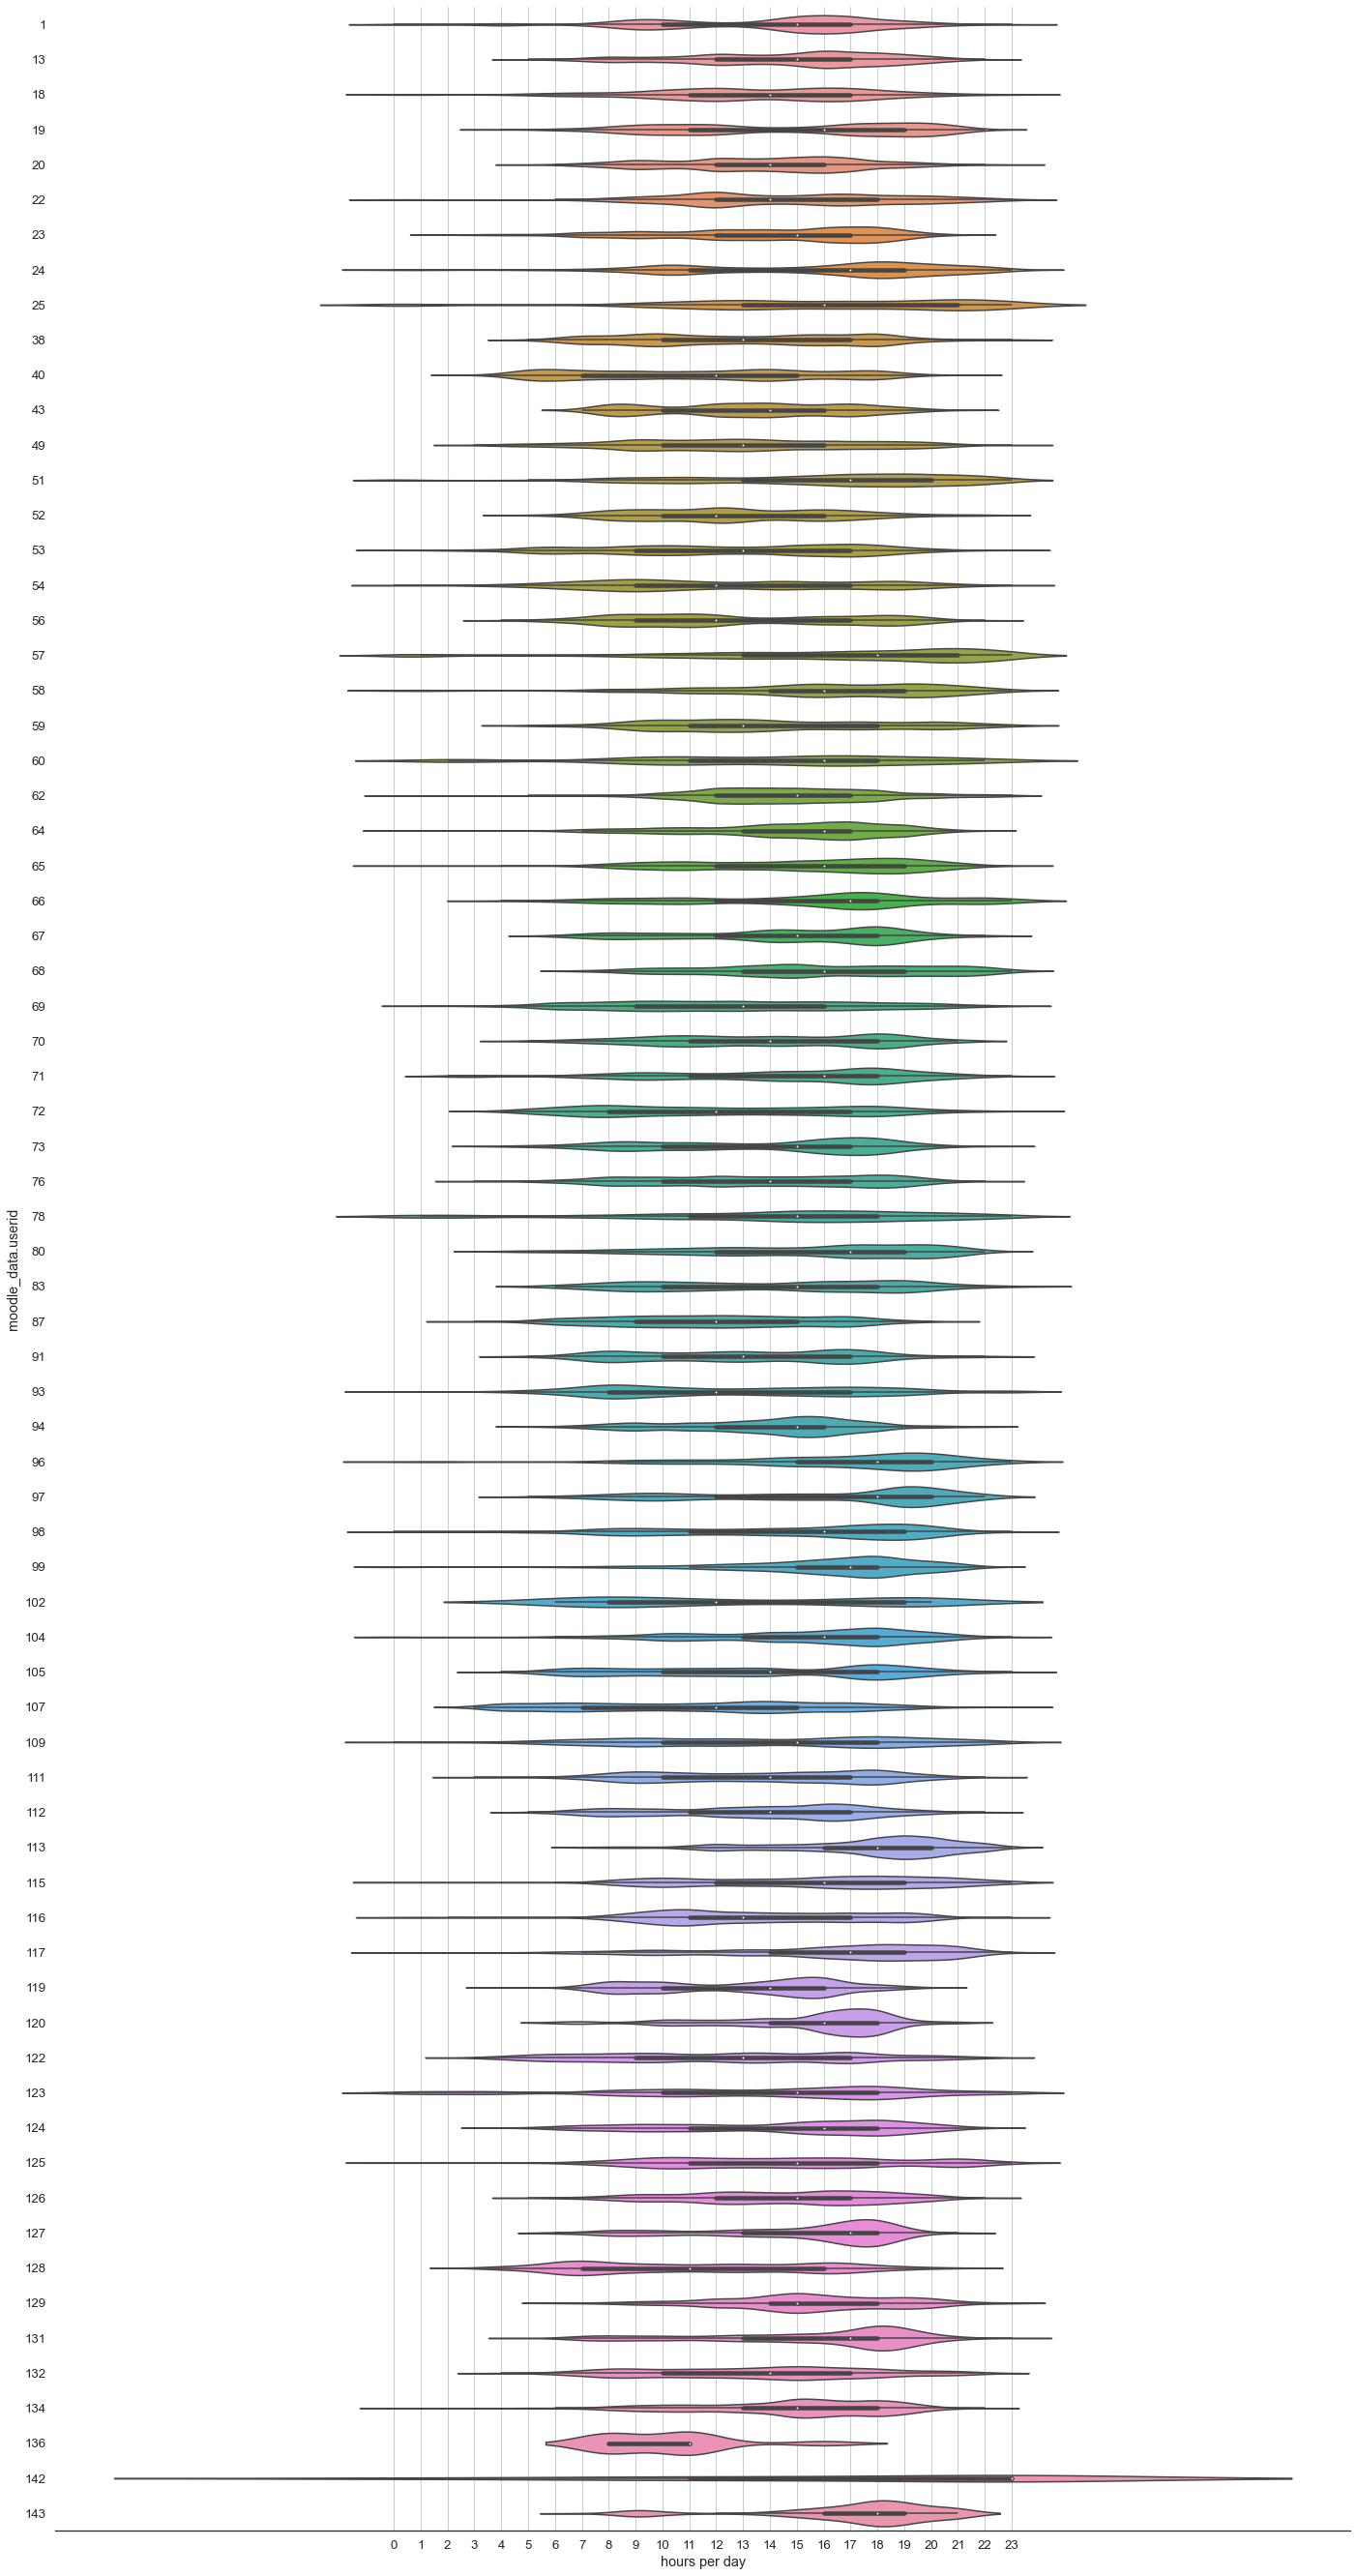

In [6438]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 48))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Student über alle Tagesstunden
chart = sns.violinplot(x=hours_per_day, y=moodle_data.userid, orient='h', order=users.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Student und Studiengang über alle Tagesstunden**

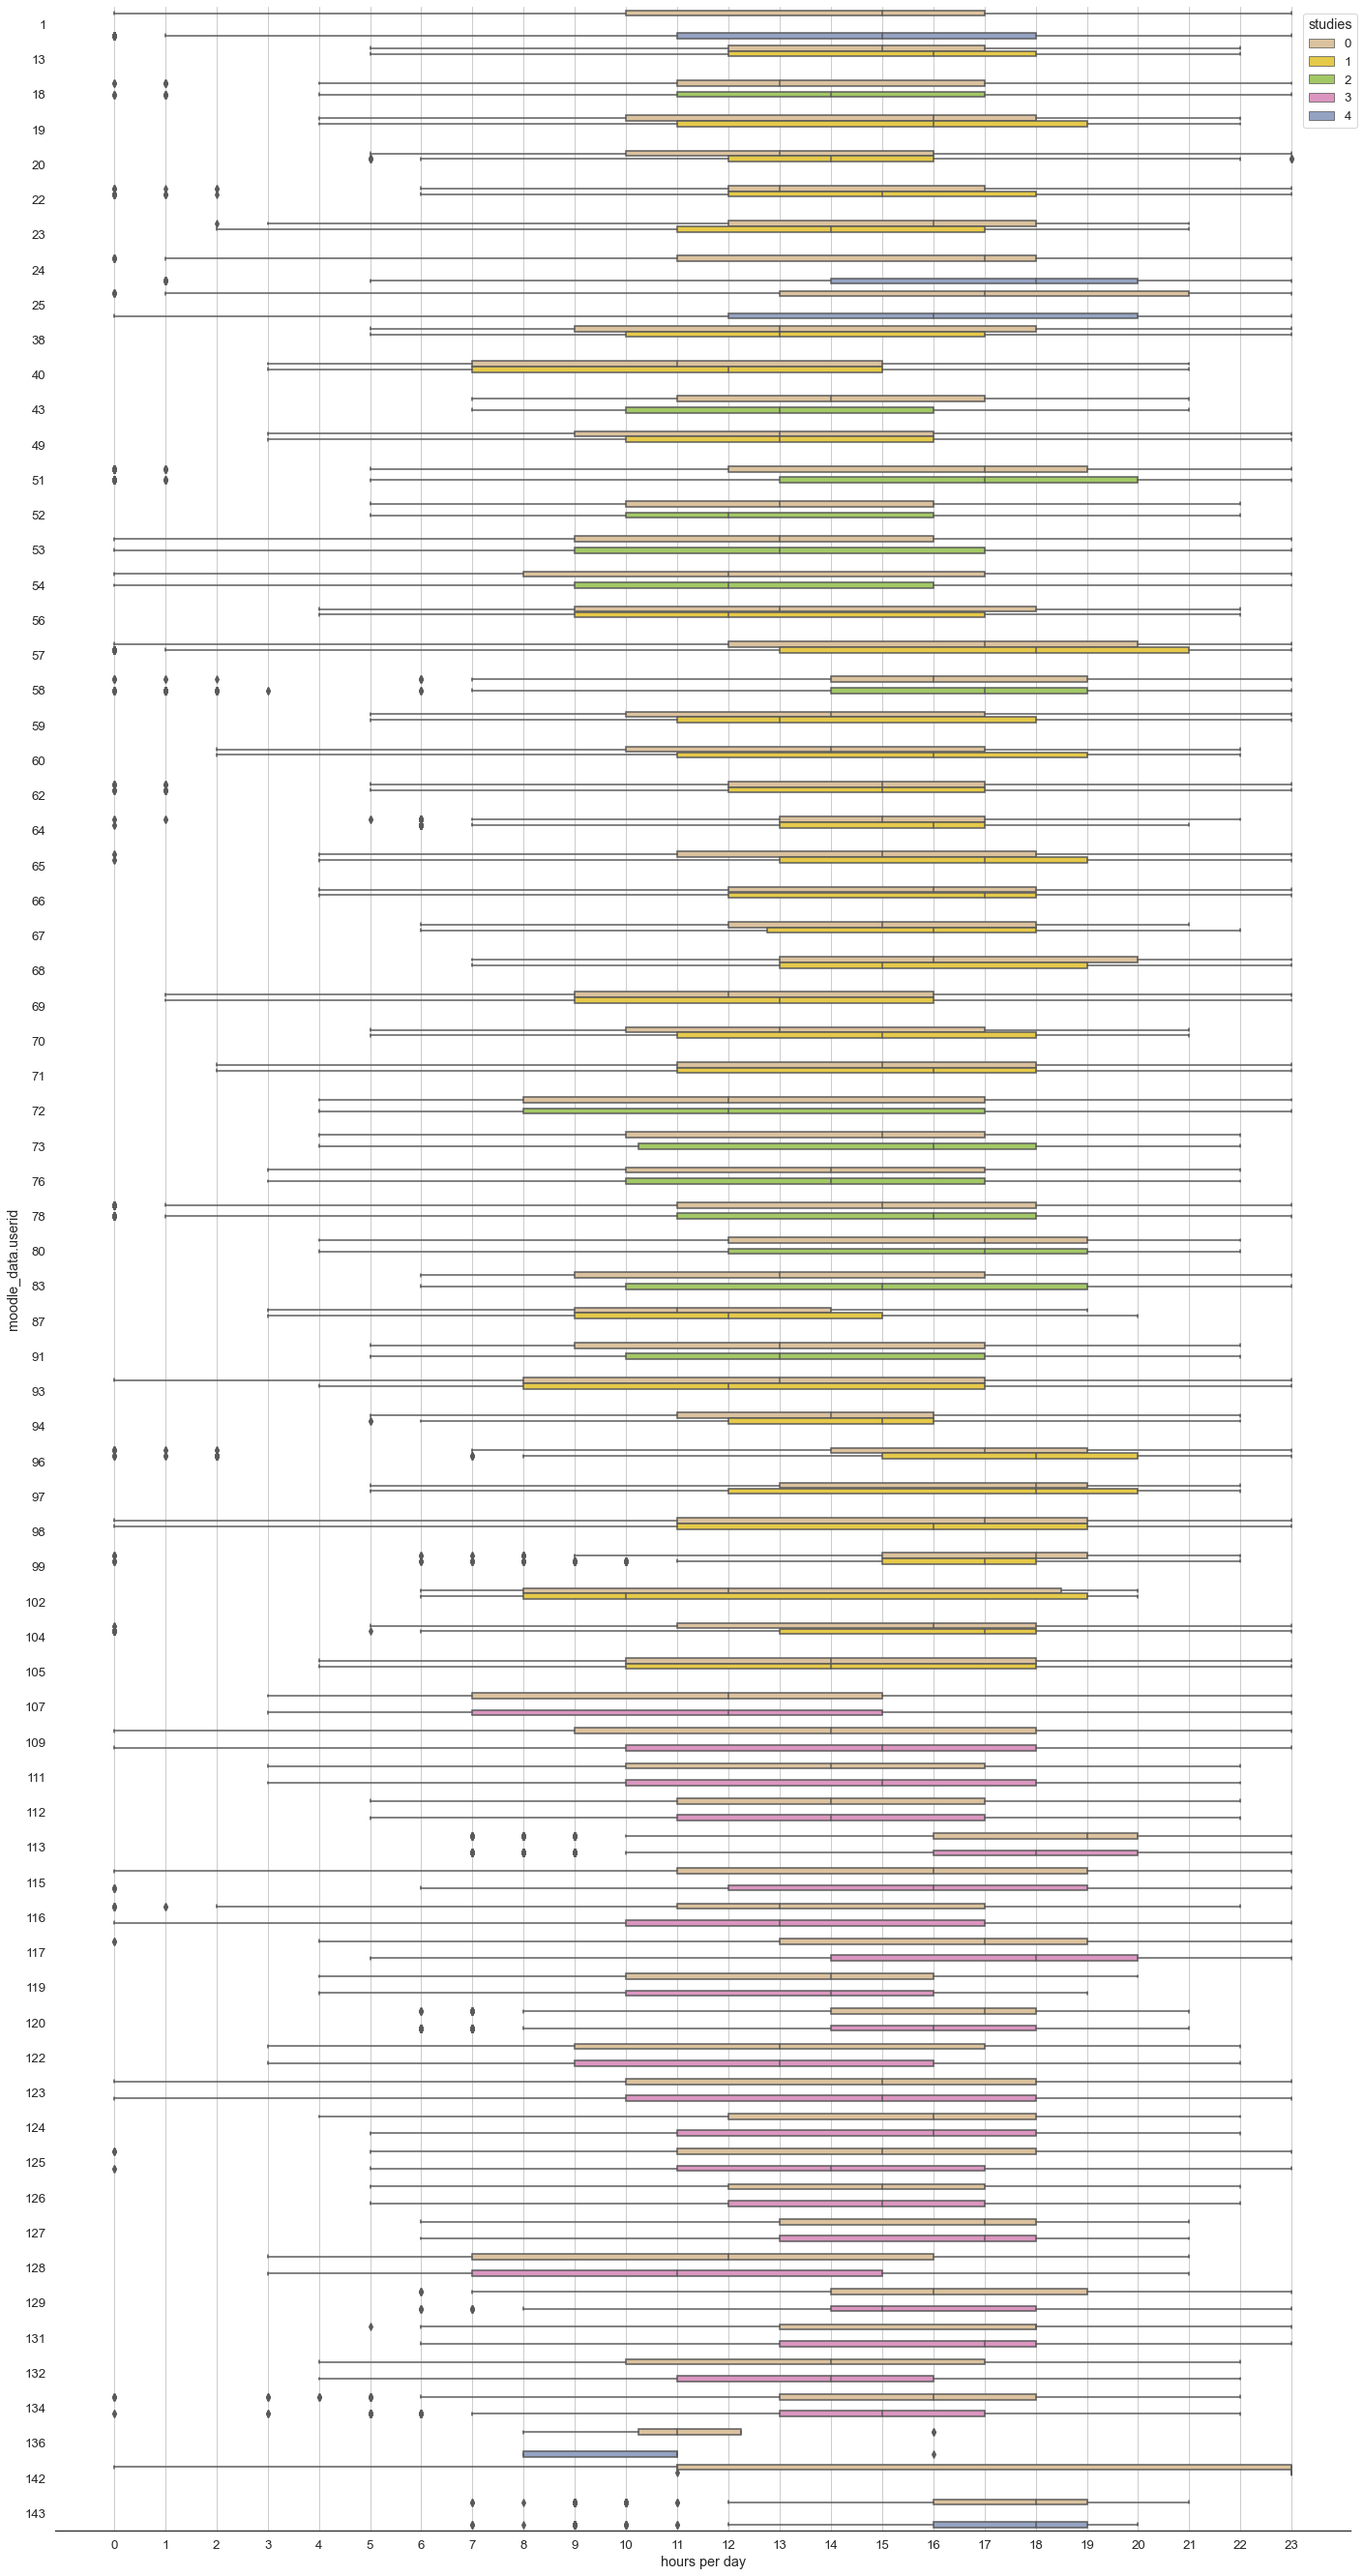

In [6439]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 48))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Student und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.userid, orient='h', order=users.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=hours_per_day, y=moodle_data.userid[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.01, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Student über alle Wochentage**

Gegenstand der Betrachtung sind Datensätze, bei denen die Aktivität von Studenten initiiert wurde (userstatus == 'student') oder bei denen ein Student mit einer Aktivität einer anderen Person in Beziehung stand (relateduserstatus == 'student'). Ungeachtet dessen, werden die Ergebnisse hier immer nur für identifizierte Studenten angezeigt.


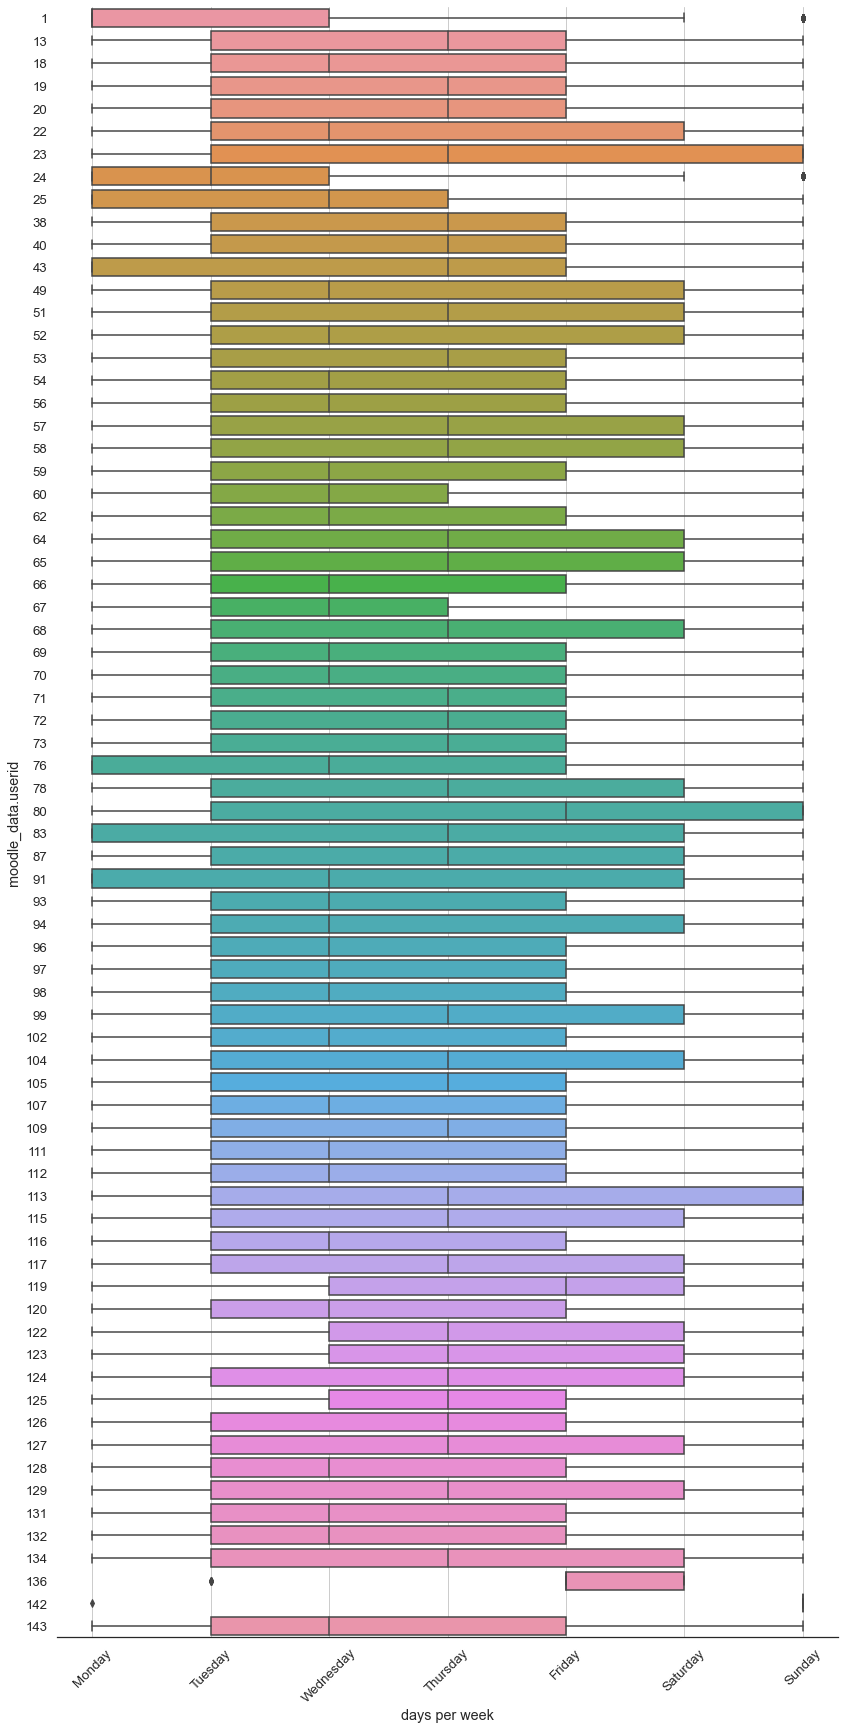

In [6440]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 30))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Student über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.userid, orient='h', order=users.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

**Ergebnis:** Die allermeisten Studenten erledigen die Hälfte ihrer Arbeit an höchstens drei Tagen, es gibt sogar 5 Studenten, die hierfür nur zwei Tage benötigen. Interessanterweise wird der Sonntag sehr oft nur geringfügig als Arbeitstag gebraucht. Auch der Samstag fällt überraschend weitestgehend als Arbeitstag aus.

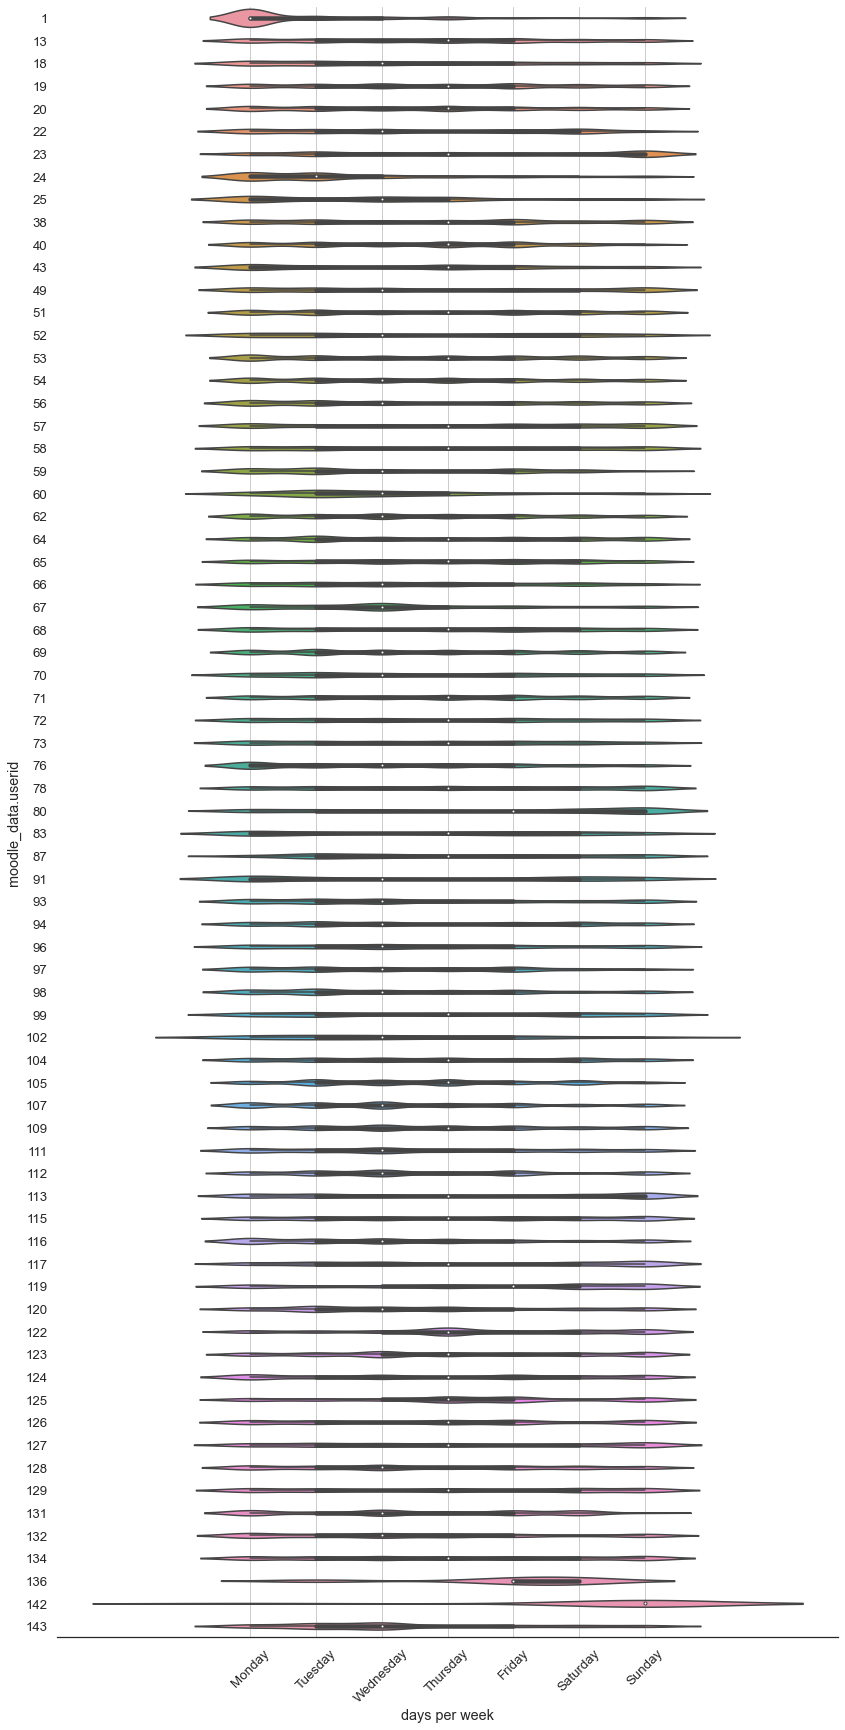

In [6441]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 30))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Student über alle Wochentage
chart = sns.violinplot(x=days_per_week, y=moodle_data.userid, orient='h', order=users.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Student und Studiengang über alle Wochentage**

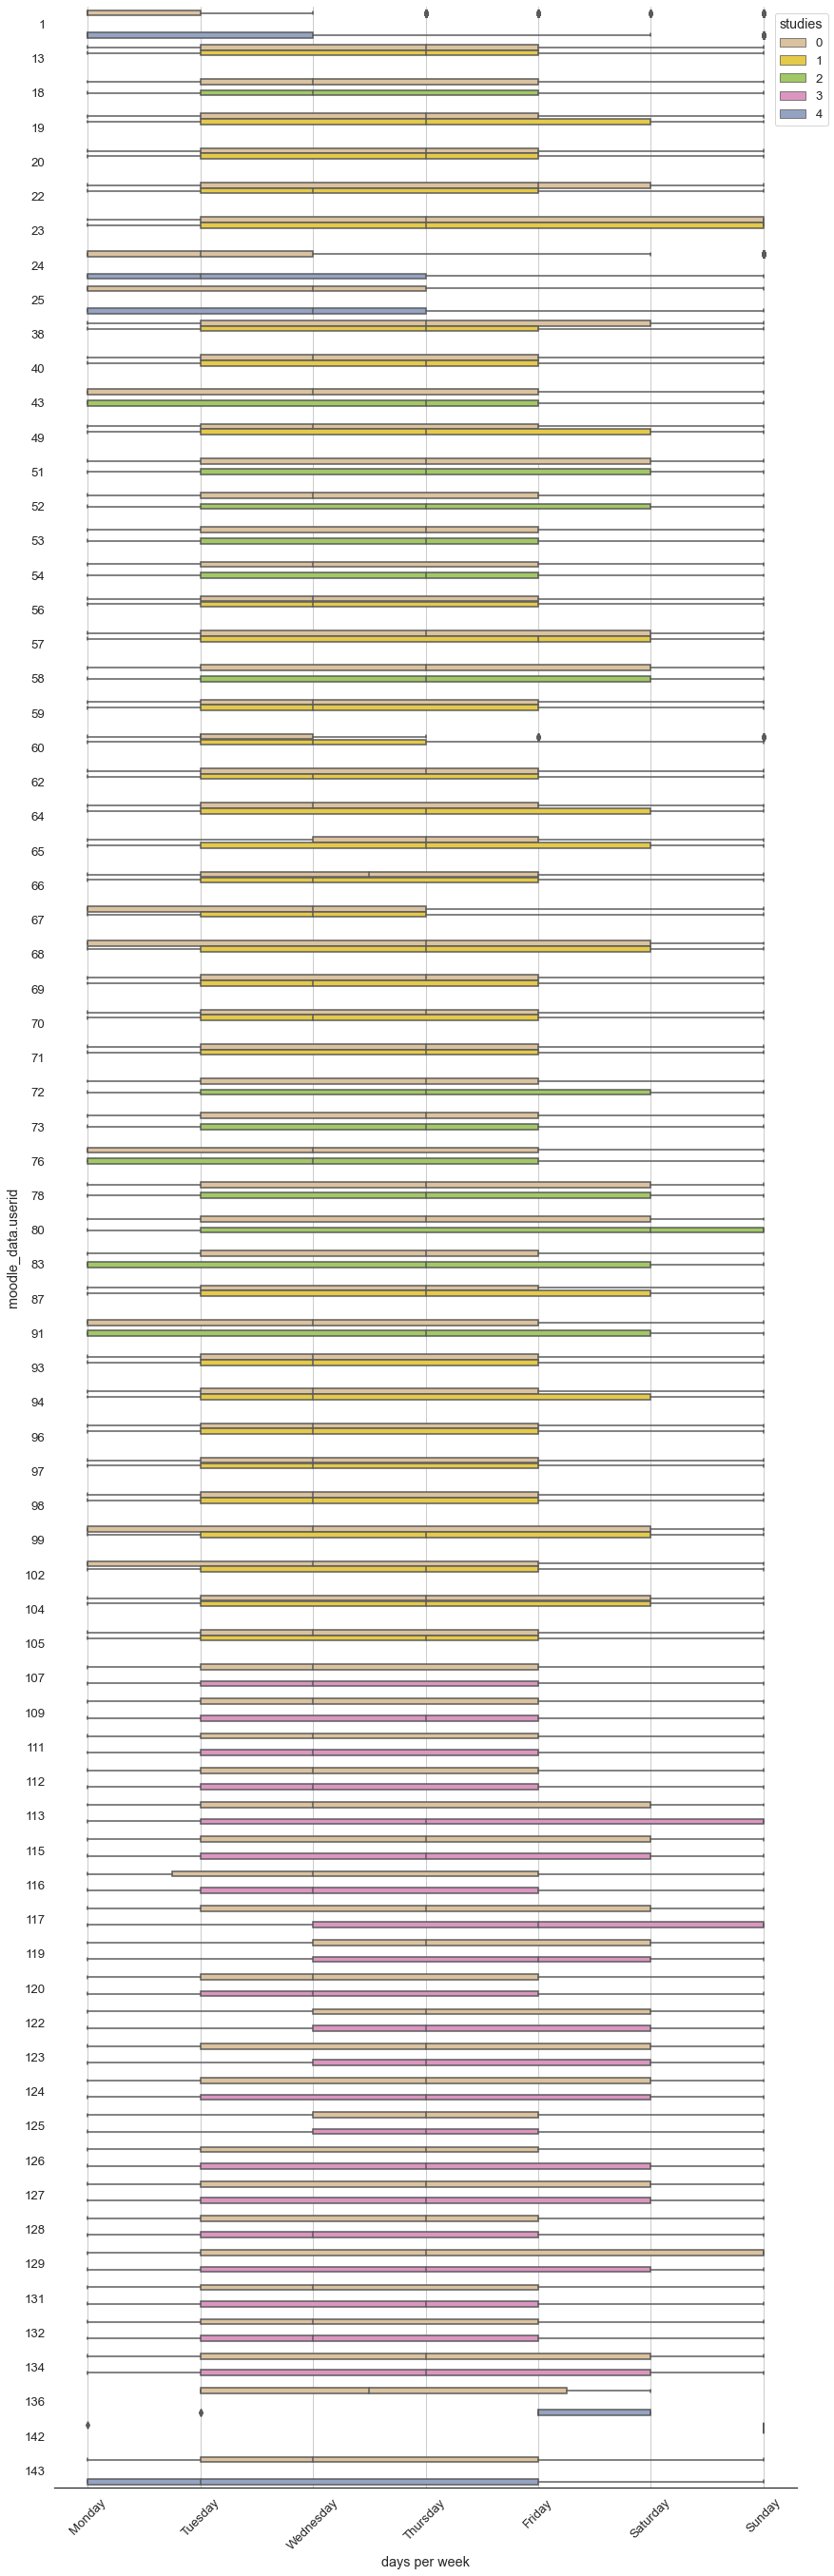

In [6442]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 48))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Student und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.userid, orient='h', order=users.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=days_per_week, y=moodle_data.userid[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.userid')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Action

&nbsp;
**Log-Einträge pro Action**

In [6443]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
accepted         169
added            707
assessed         149
assigned         729
created         7362
deleted         1402
downloaded        47
duplicated         5
ended              9
failed          2463
graded          4630
granted           17
joined           642
left              98
locked            72
loggedin       20854
loggedout       5643
reassessed        66
regraded          22
removed           36
reset              7
restored           1
reviewed        1301
searched          42
sent           40213
started          944
submitted       2265
unassigned        82
unlocked          26
updated         7878
uploaded        3413
viewed        232479
Name: action, dtype: int64

&nbsp;
**Menge der Log-Einträge pro Action über alle Tagesstunden**

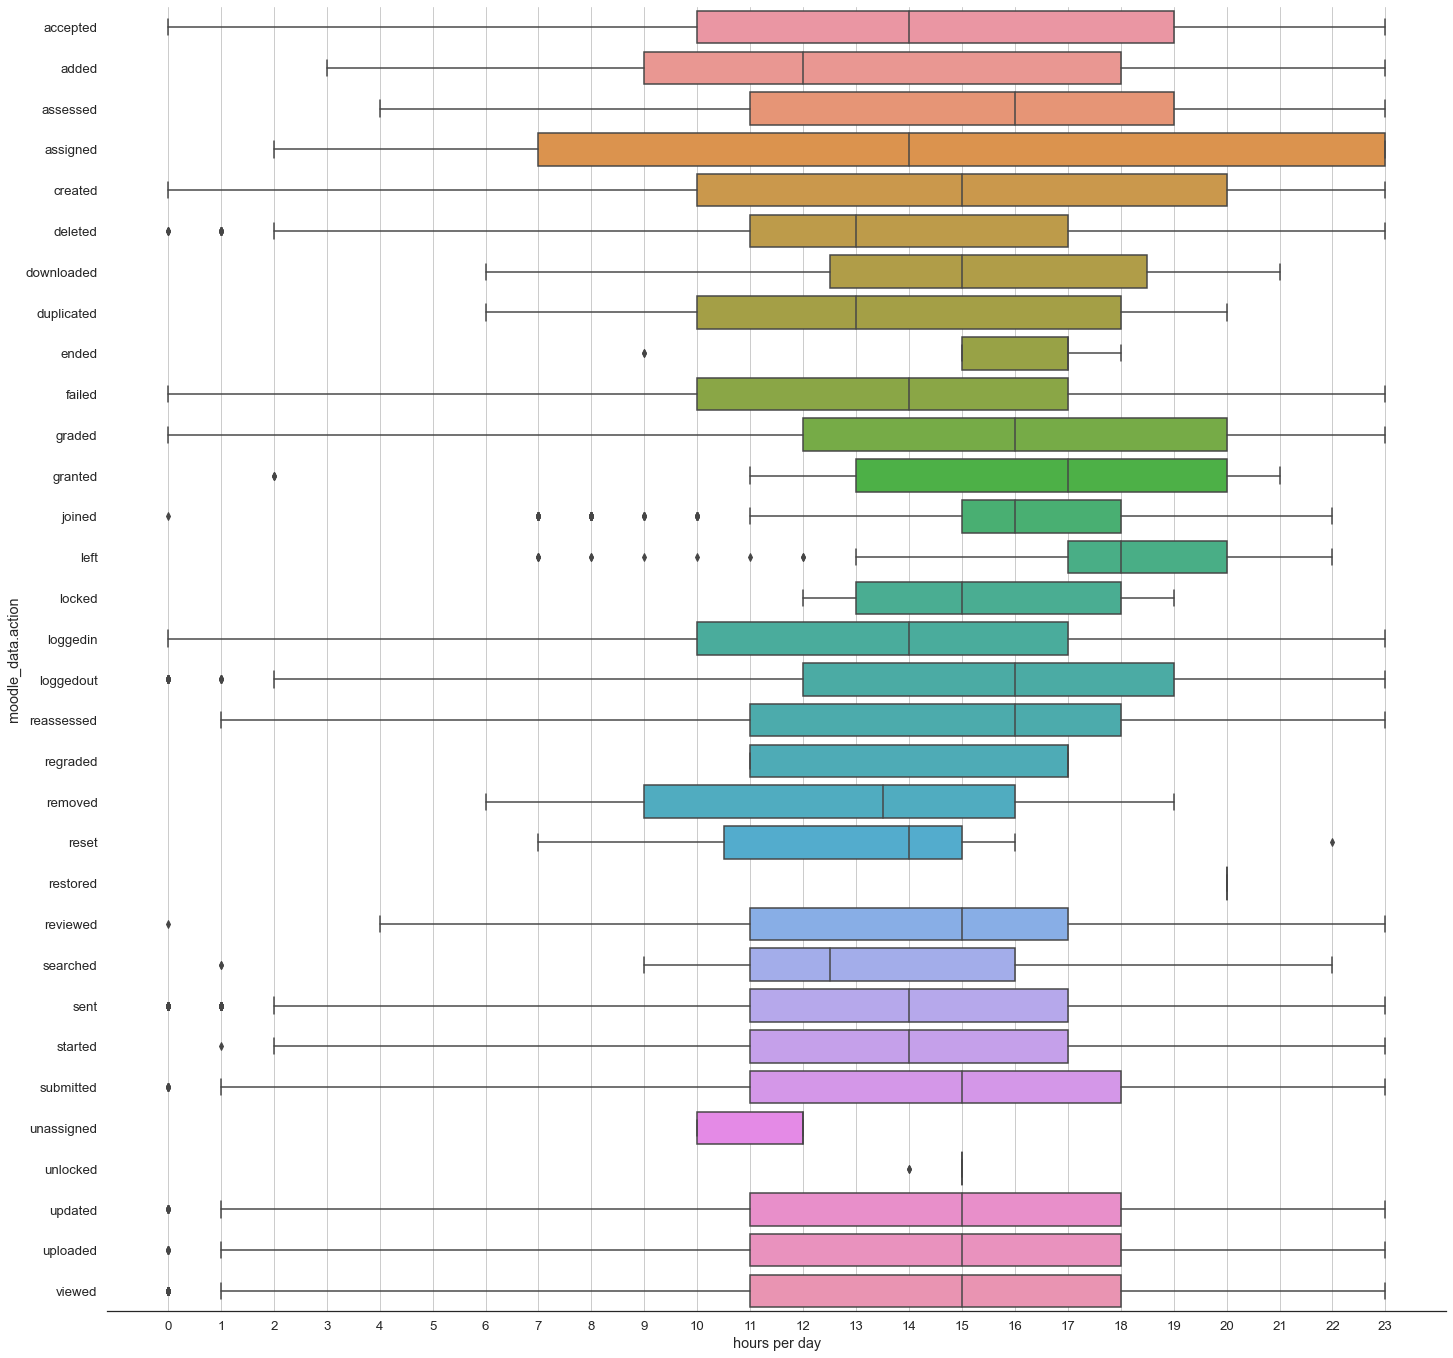

In [6444]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 24))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action, orient='h', order=actions.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

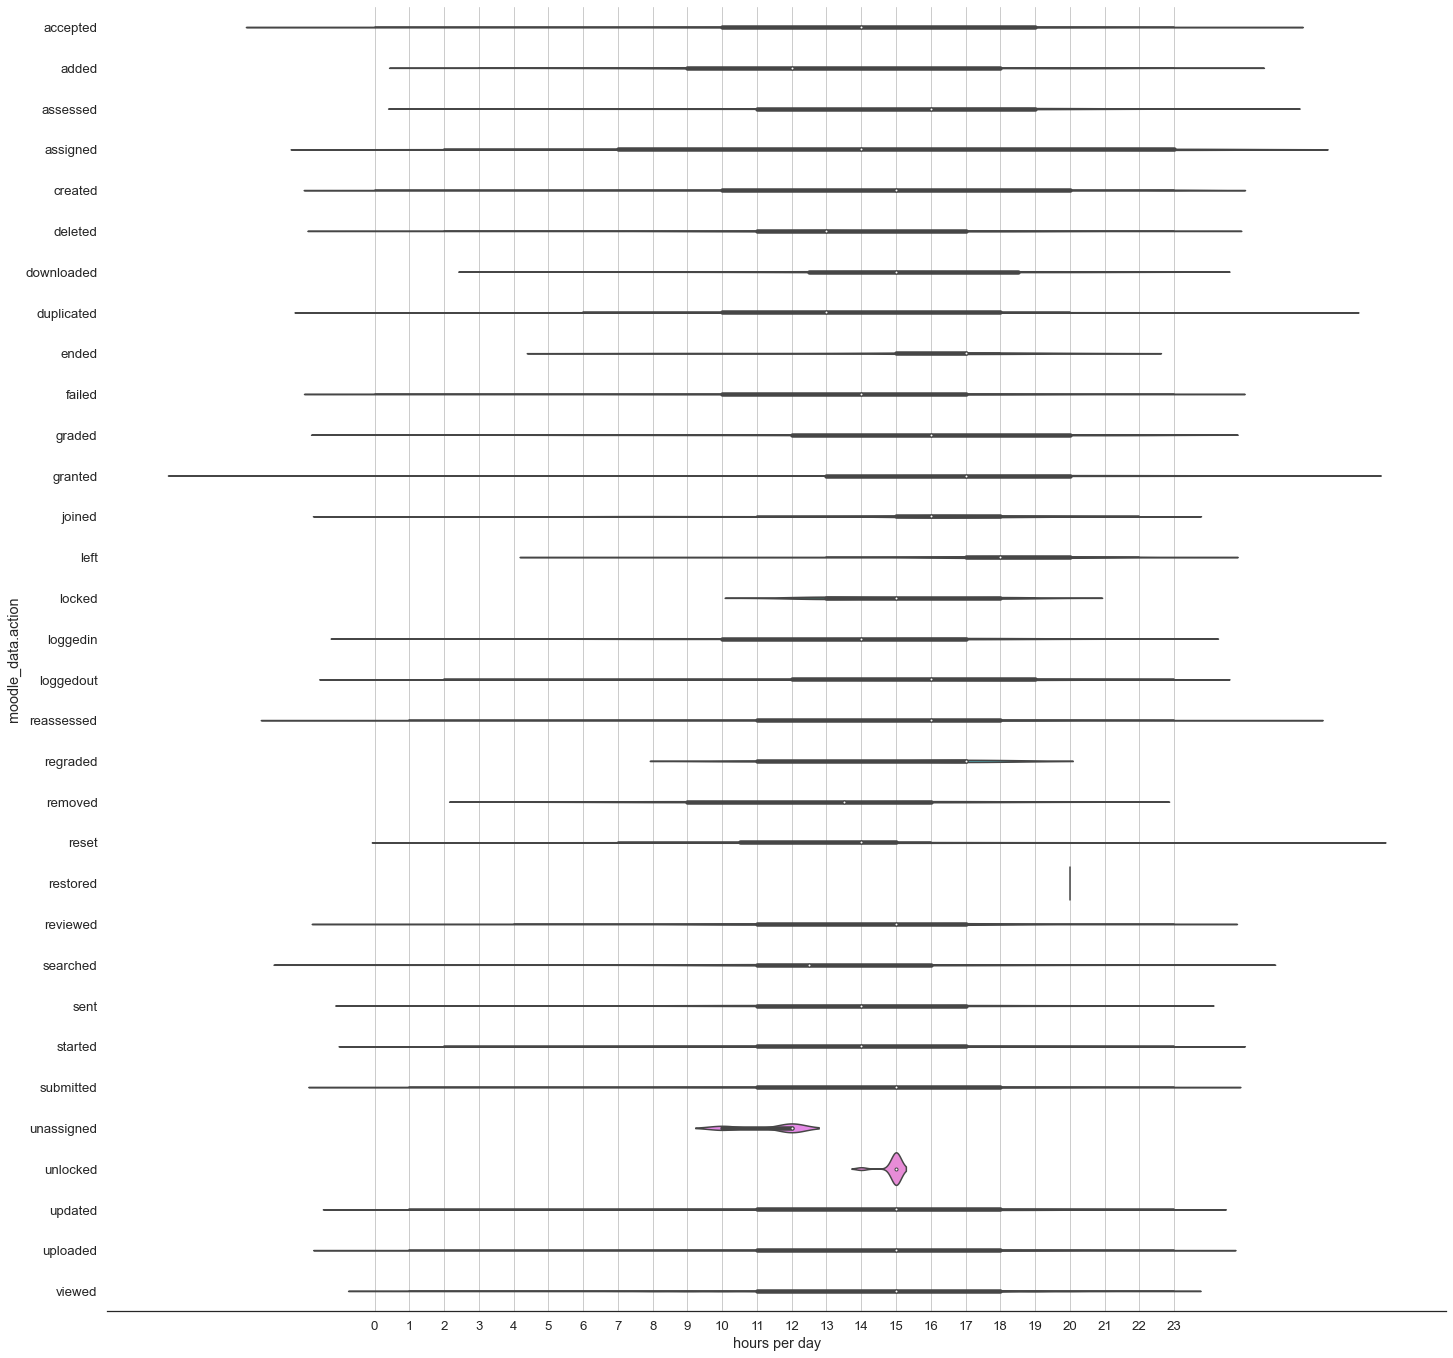

In [6445]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 24))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action über alle Tagesstunden
chart = sns.violinplot(x=hours_per_day, y=moodle_data.action, orient='h', order=actions.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Action und Studiengang über alle Tagesstunden**

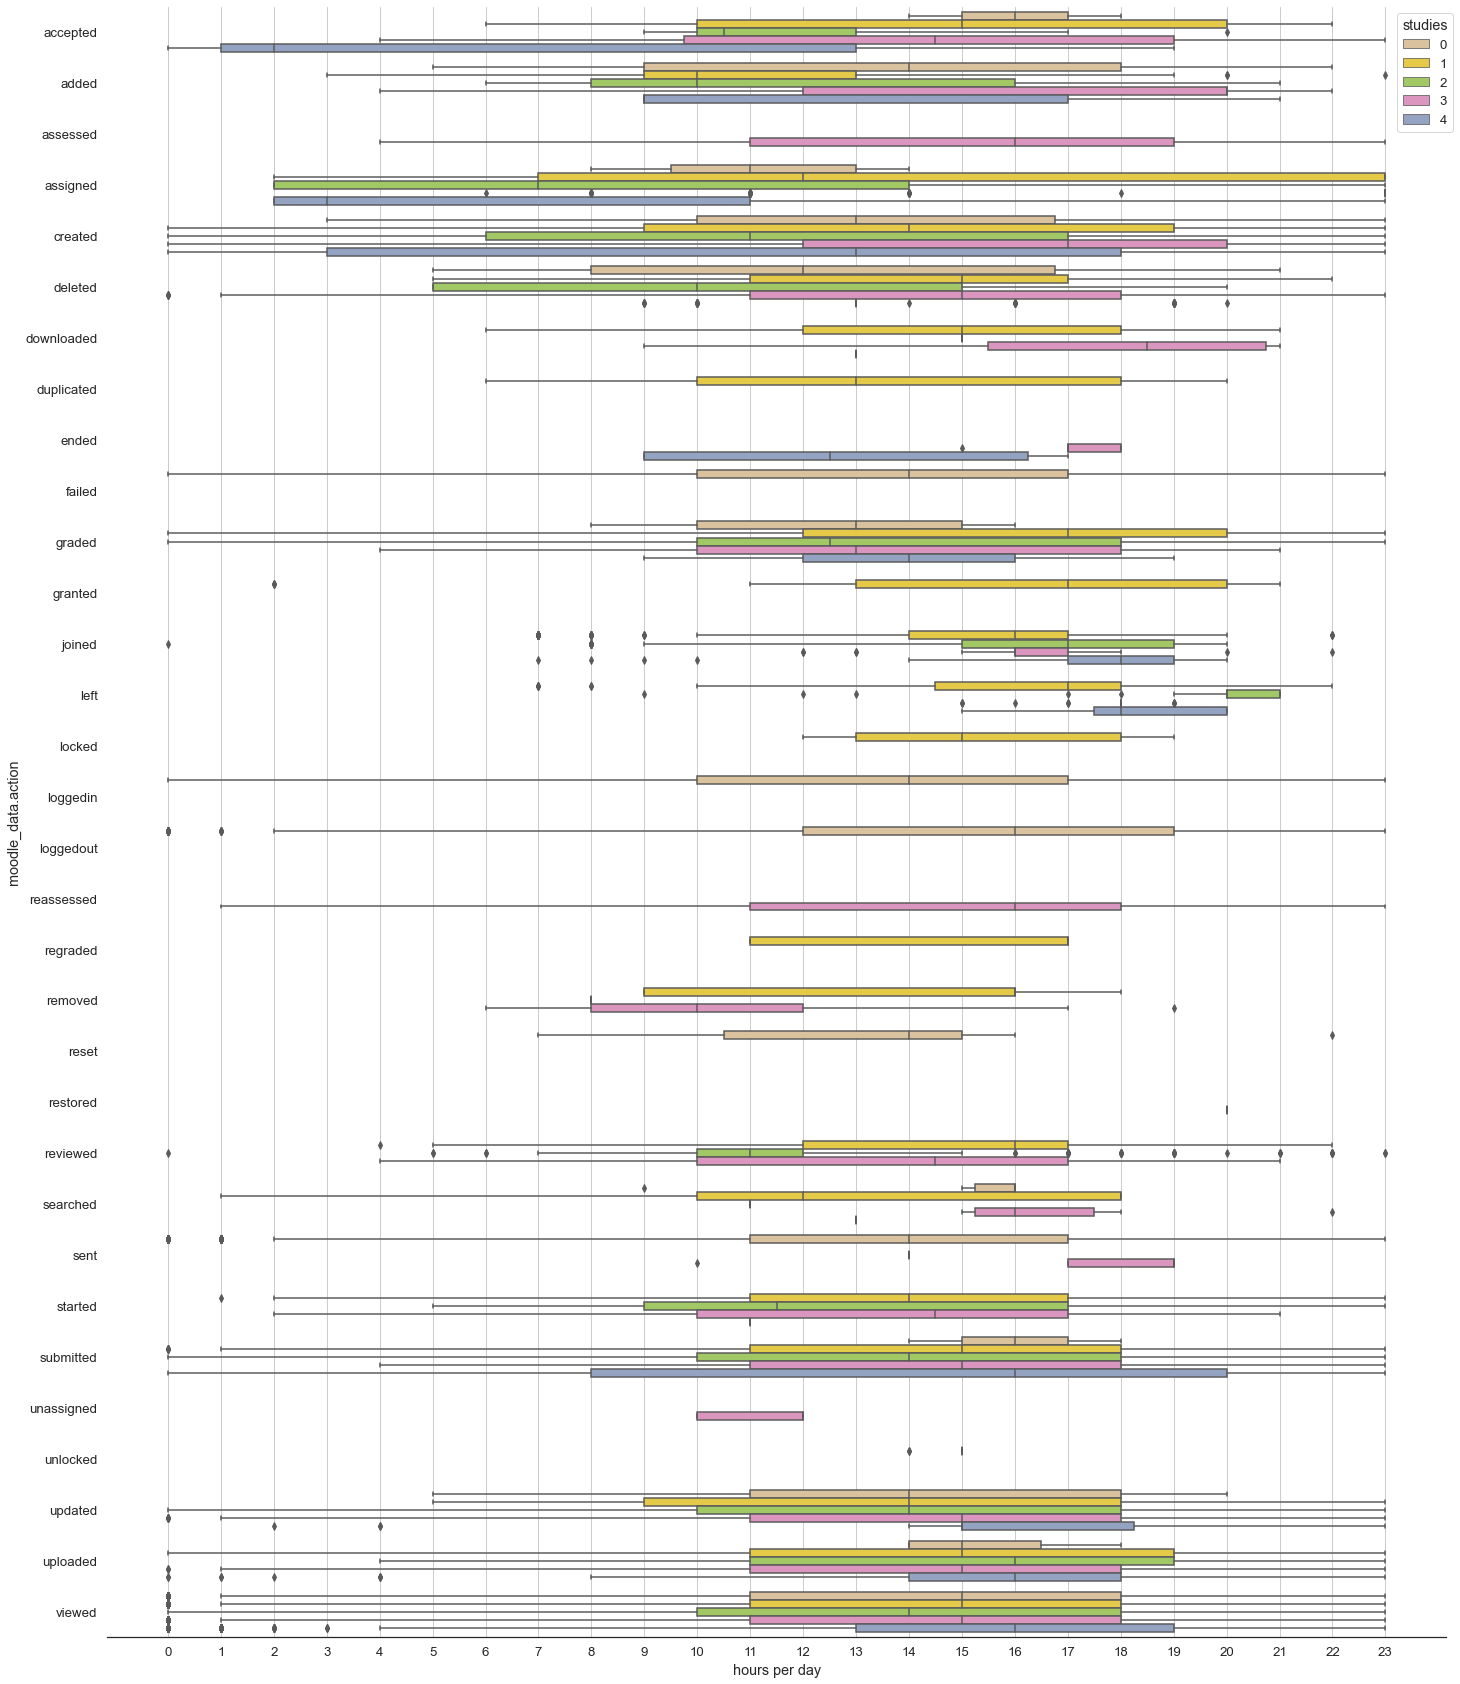

In [6446]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 30))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action, orient='h', order=actions.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', order=actions.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.01, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Action über alle Wochentage**

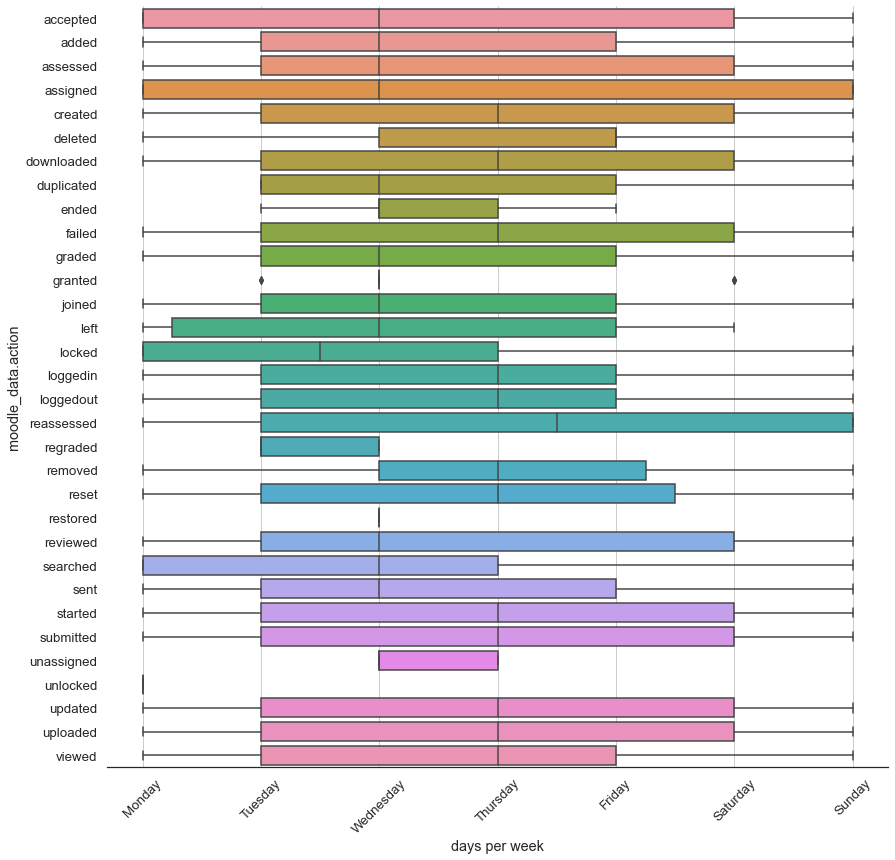

In [6447]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 14))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action, orient='h', order=actions.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

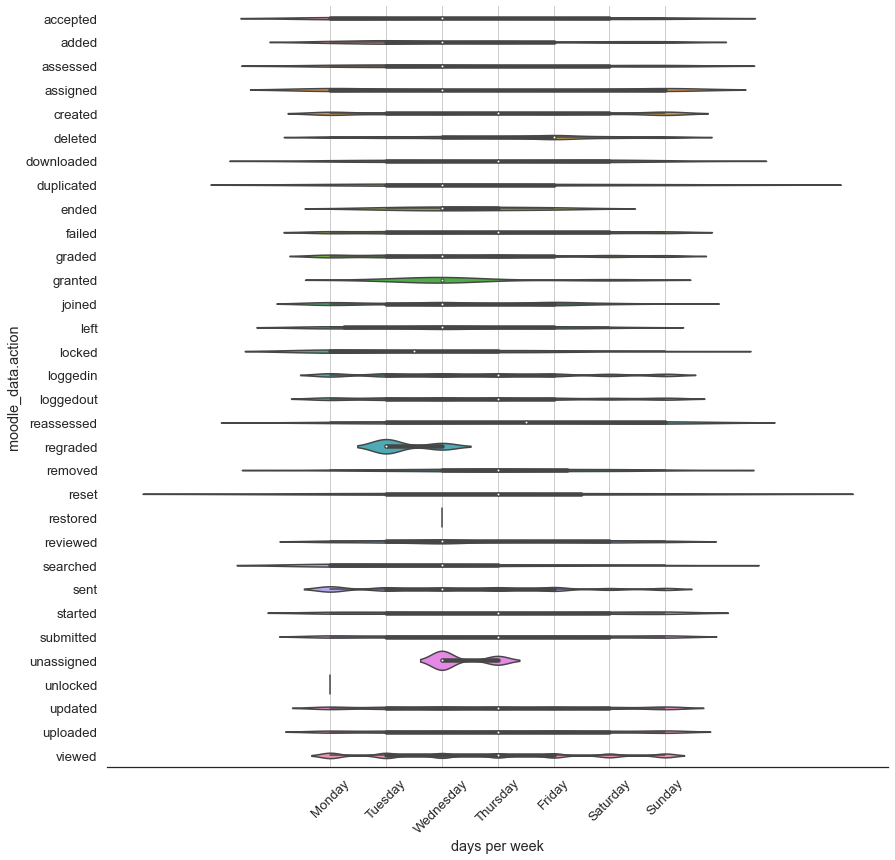

In [6448]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 14))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action über alle Wochentage
chart = sns.violinplot(x=days_per_week, y=moodle_data.action, orient='h', order=actions.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Action und Studiengang über alle Wochentage**

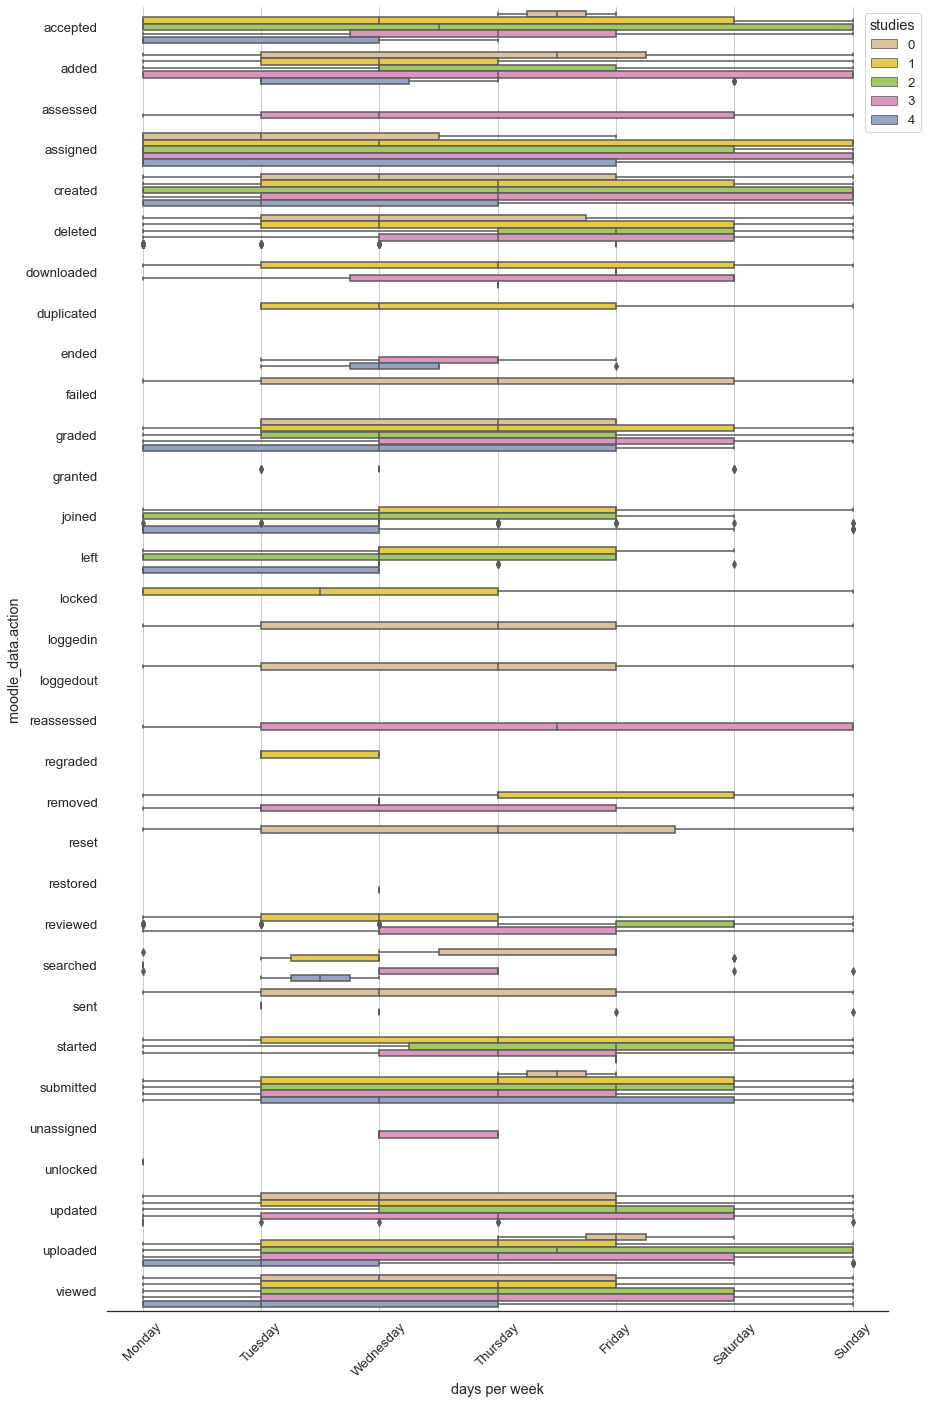

In [6449]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 24))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action, orient='h', order=actions.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.action')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Eventname

&nbsp;
**Log-Einträge pro Eventname**

In [6450]:
eventnames = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventnames)

eventname
\assignsubmission_comments\event\comment_created      73
\assignsubmission_comments\event\comment_deleted       3
\assignsubmission_file\event\assessable_uploaded    1166
\assignsubmission_file\event\submission_created      996
\assignsubmission_file\event\submission_updated      170
                                                    ... 
\mod_workshop\event\submission_created                22
\mod_workshop\event\submission_reassessed             66
\mod_workshop\event\submission_updated                26
\mod_workshop\event\submission_viewed                418
\report_outline\event\report_viewed                    2
Name: eventname, Length: 149, dtype: int64

&nbsp;
**Menge der Log-Einträge pro Eventname über alle Tagesstunden**

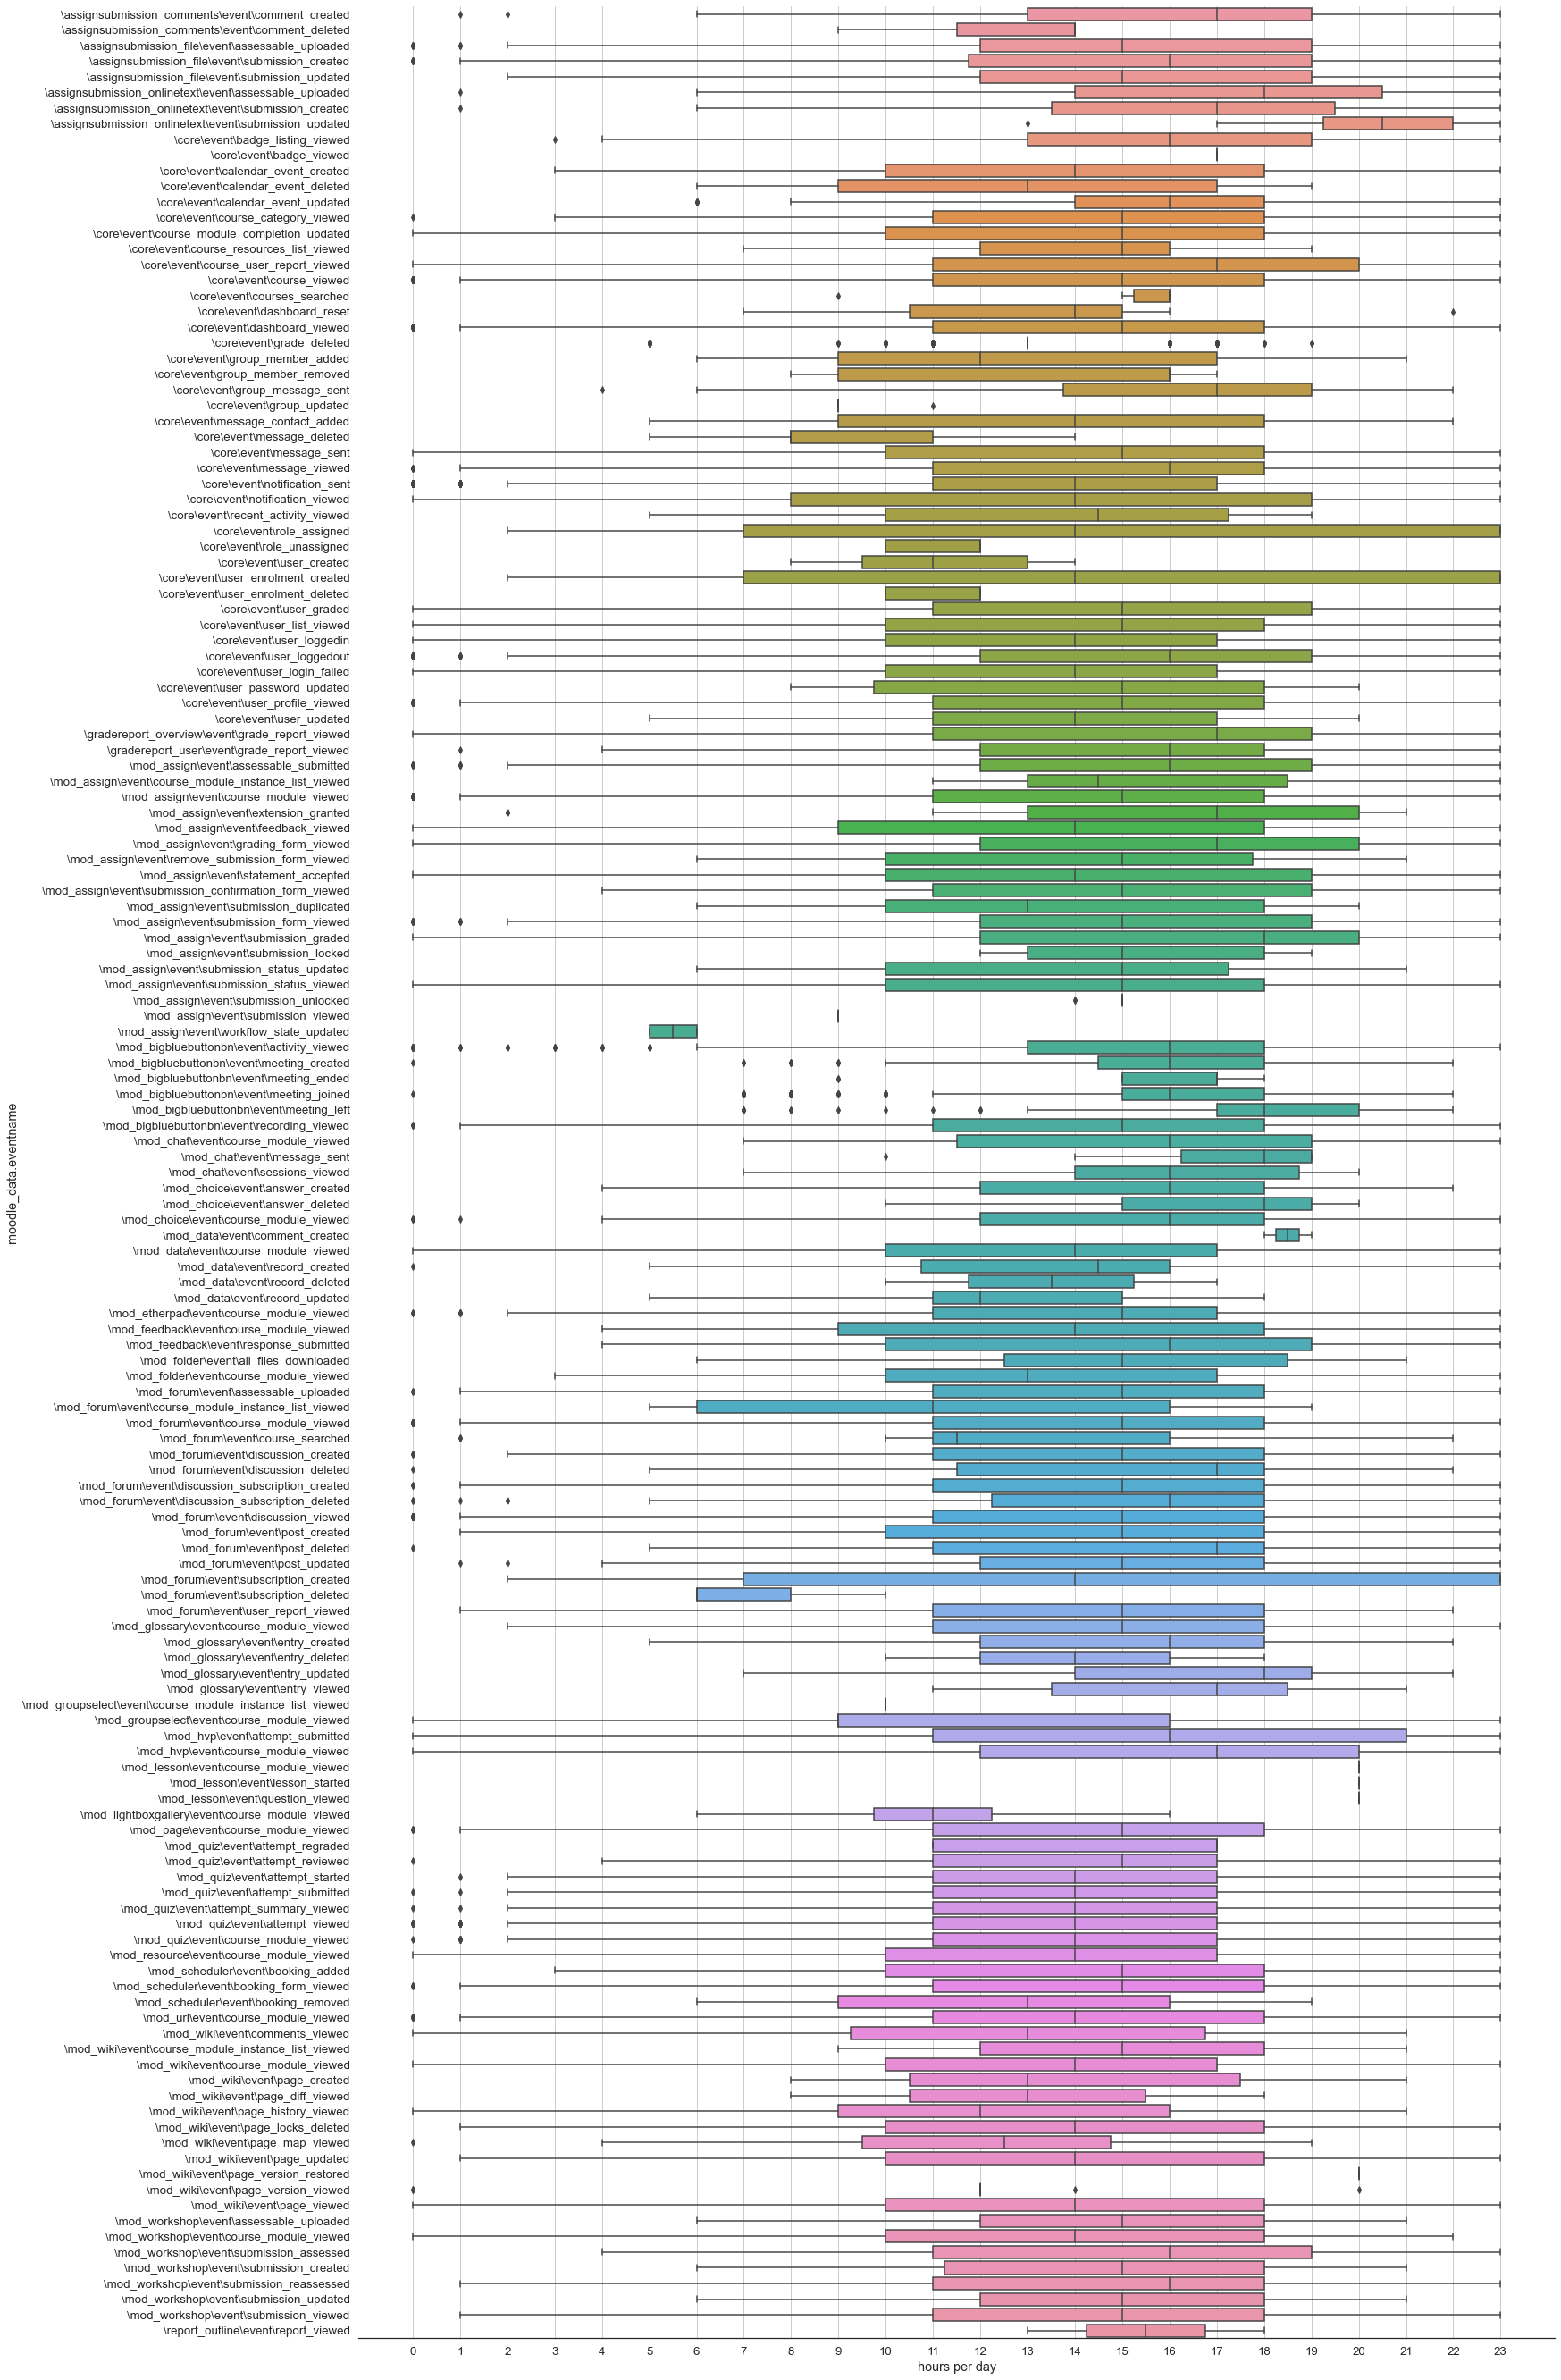

In [6451]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 48))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Eventname über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.eventname, orient='h', order=eventnames.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.eventname')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Eventname über alle Wochentage**

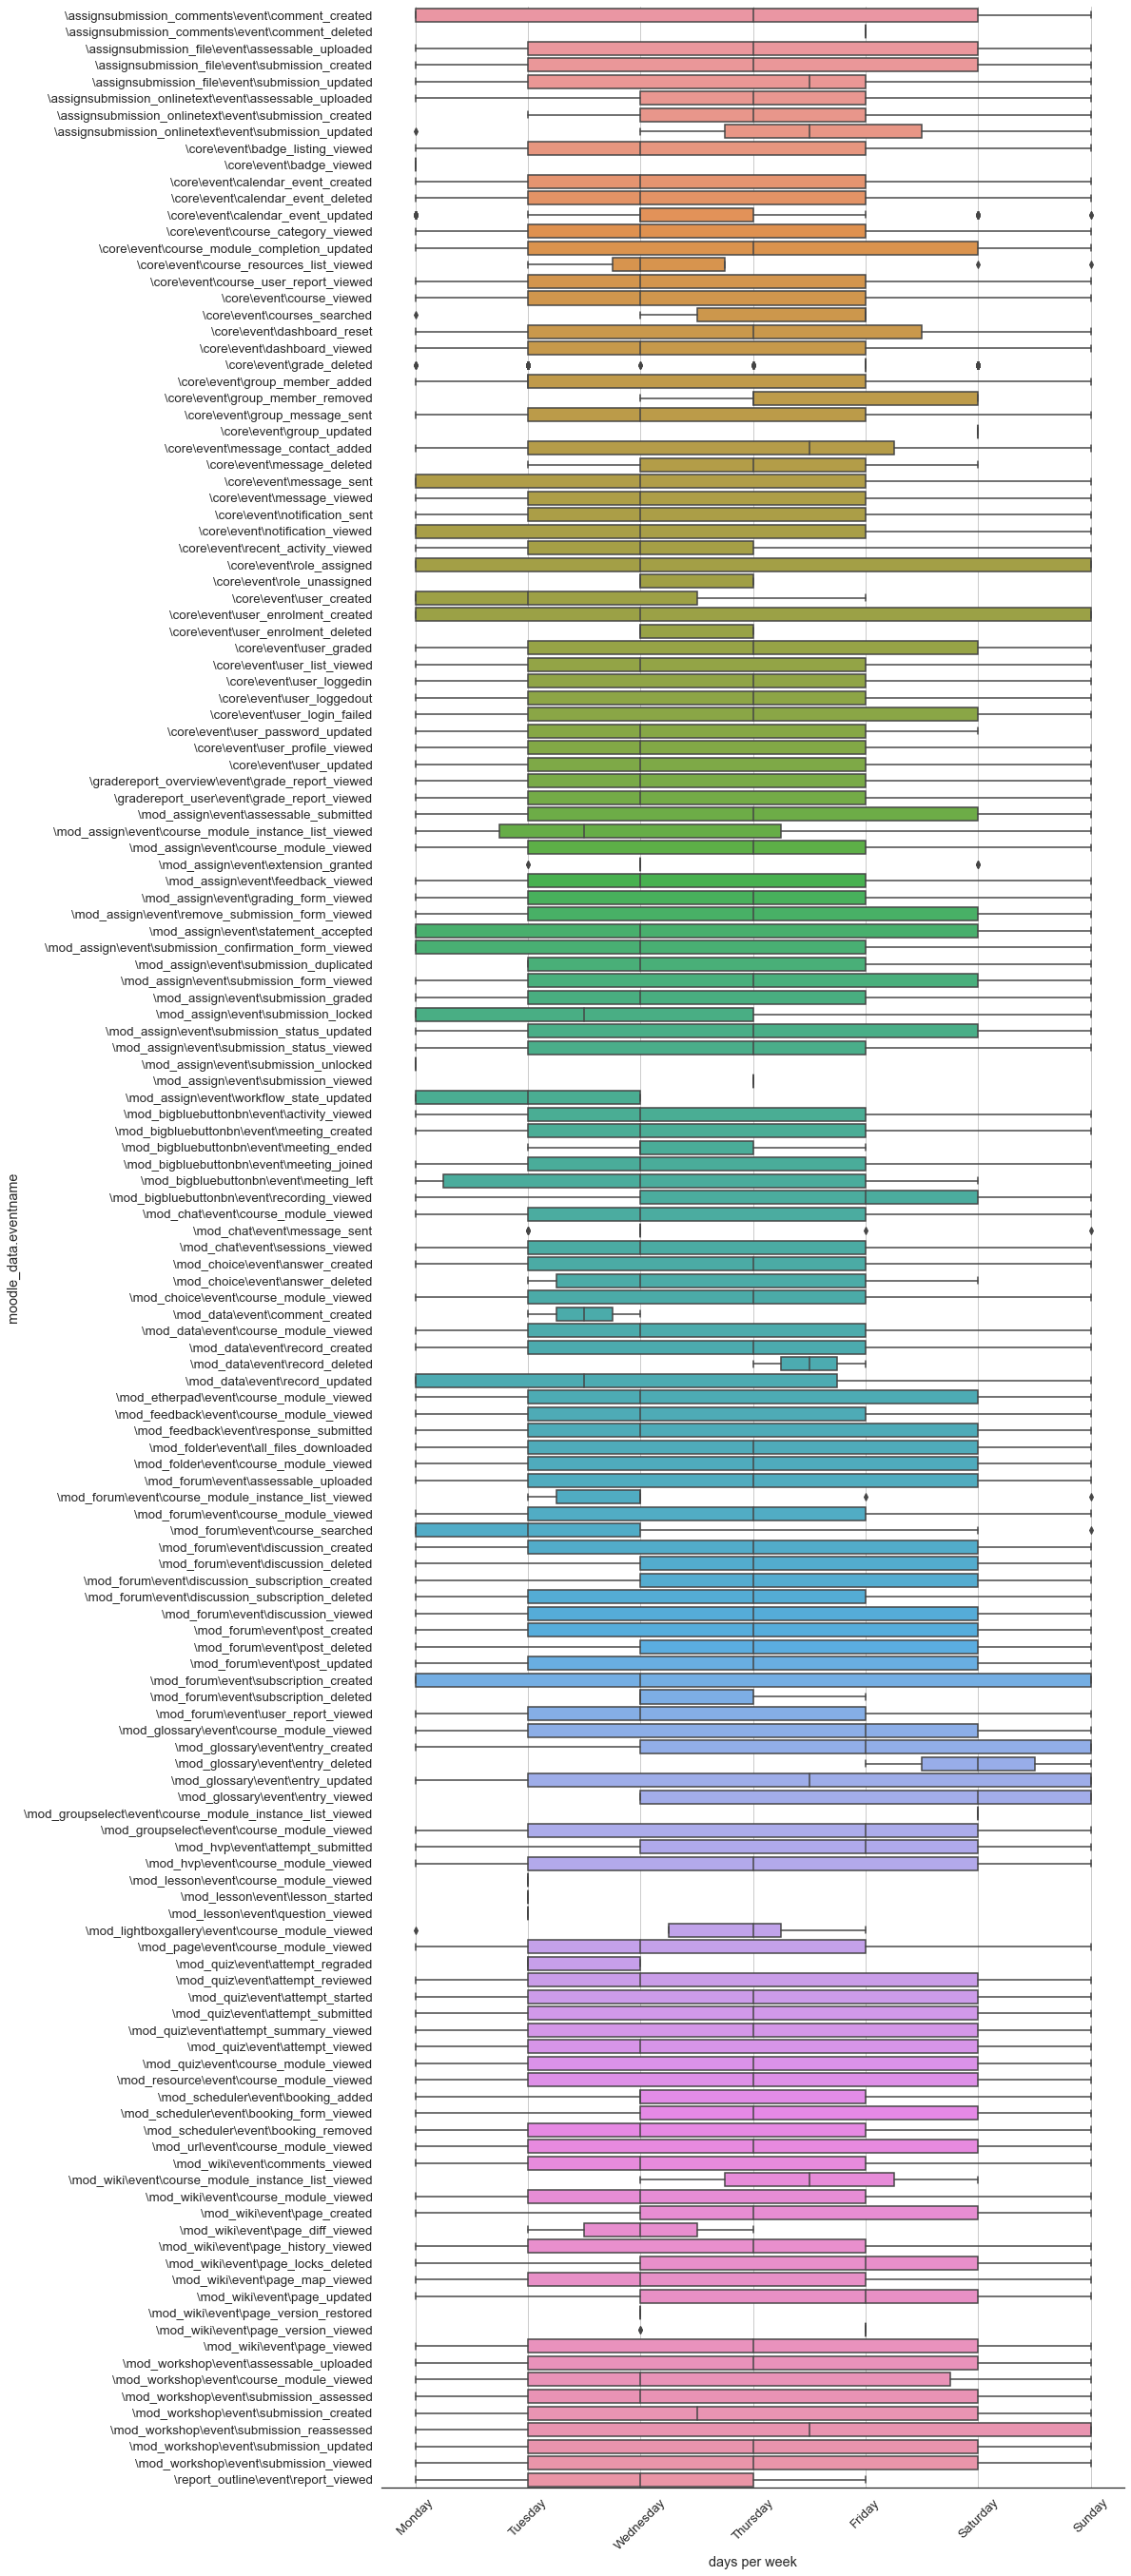

In [6452]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 48))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Eventname über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.eventname, orient='h', order=eventnames.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.eventname')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Objecttable

&nbsp;
**Log-Einträge pro Objecttable**

In [6453]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                               124898
assign                          15215
assign_grades                    3049
assign_submission                2605
assignsubmission_file            1166
assignsubmission_onlinetext        35
bigbluebuttonbn                  2449
chat                              185
chat_messages                      20
choice                           1336
choice_answers                    174
comments                           78
course                            892
course_categories                 315
course_modules_completion        6581
data                              539
data_records                       72
etherpad                          844
event                             336
feedback                          216
feedback_completed                140
folder                           1233
forum                           12146
forum_discussion_subs            1786
forum_discussions               15093
forum_posts                      3615


&nbsp;
**Menge der Log-Einträge pro Objecttable über alle Tagesstunden**

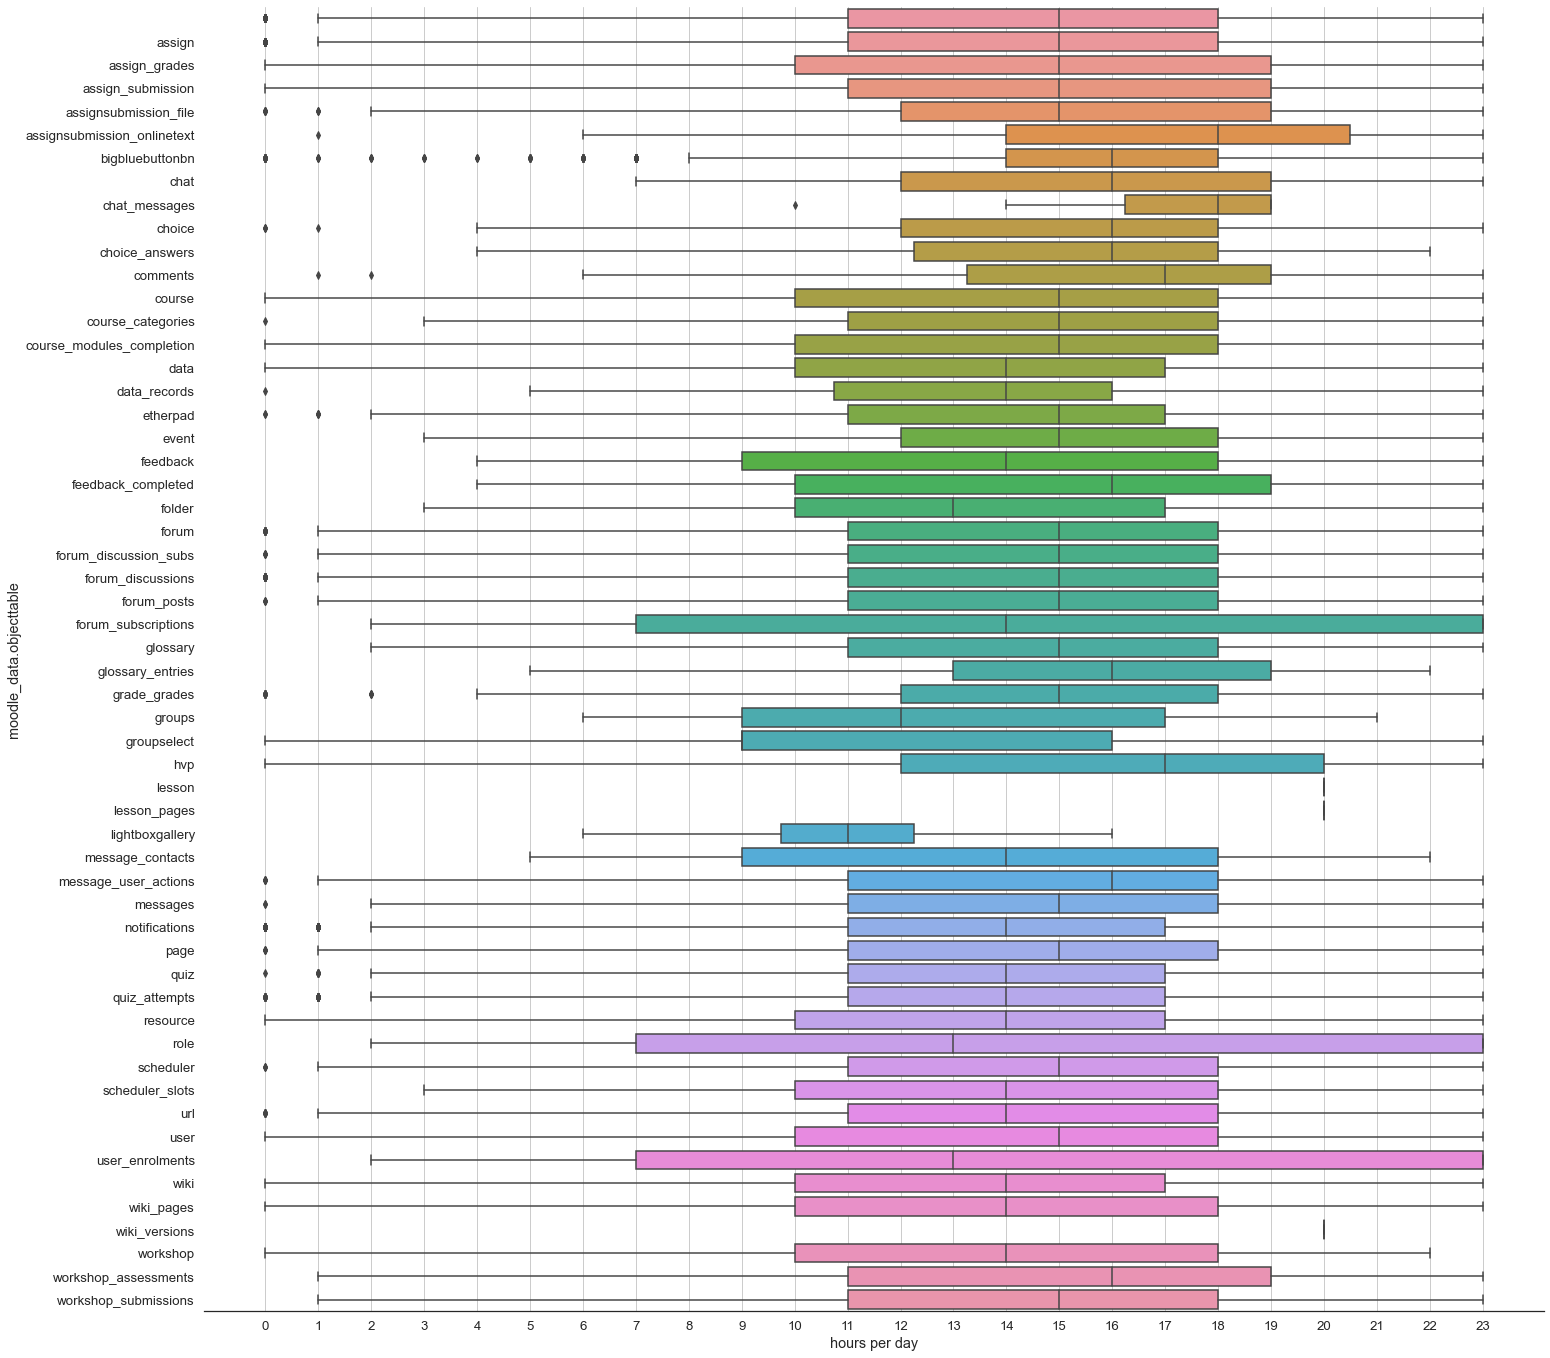

In [6454]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 24))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Objecttable über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.objecttable, orient='h', order=objecttables.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

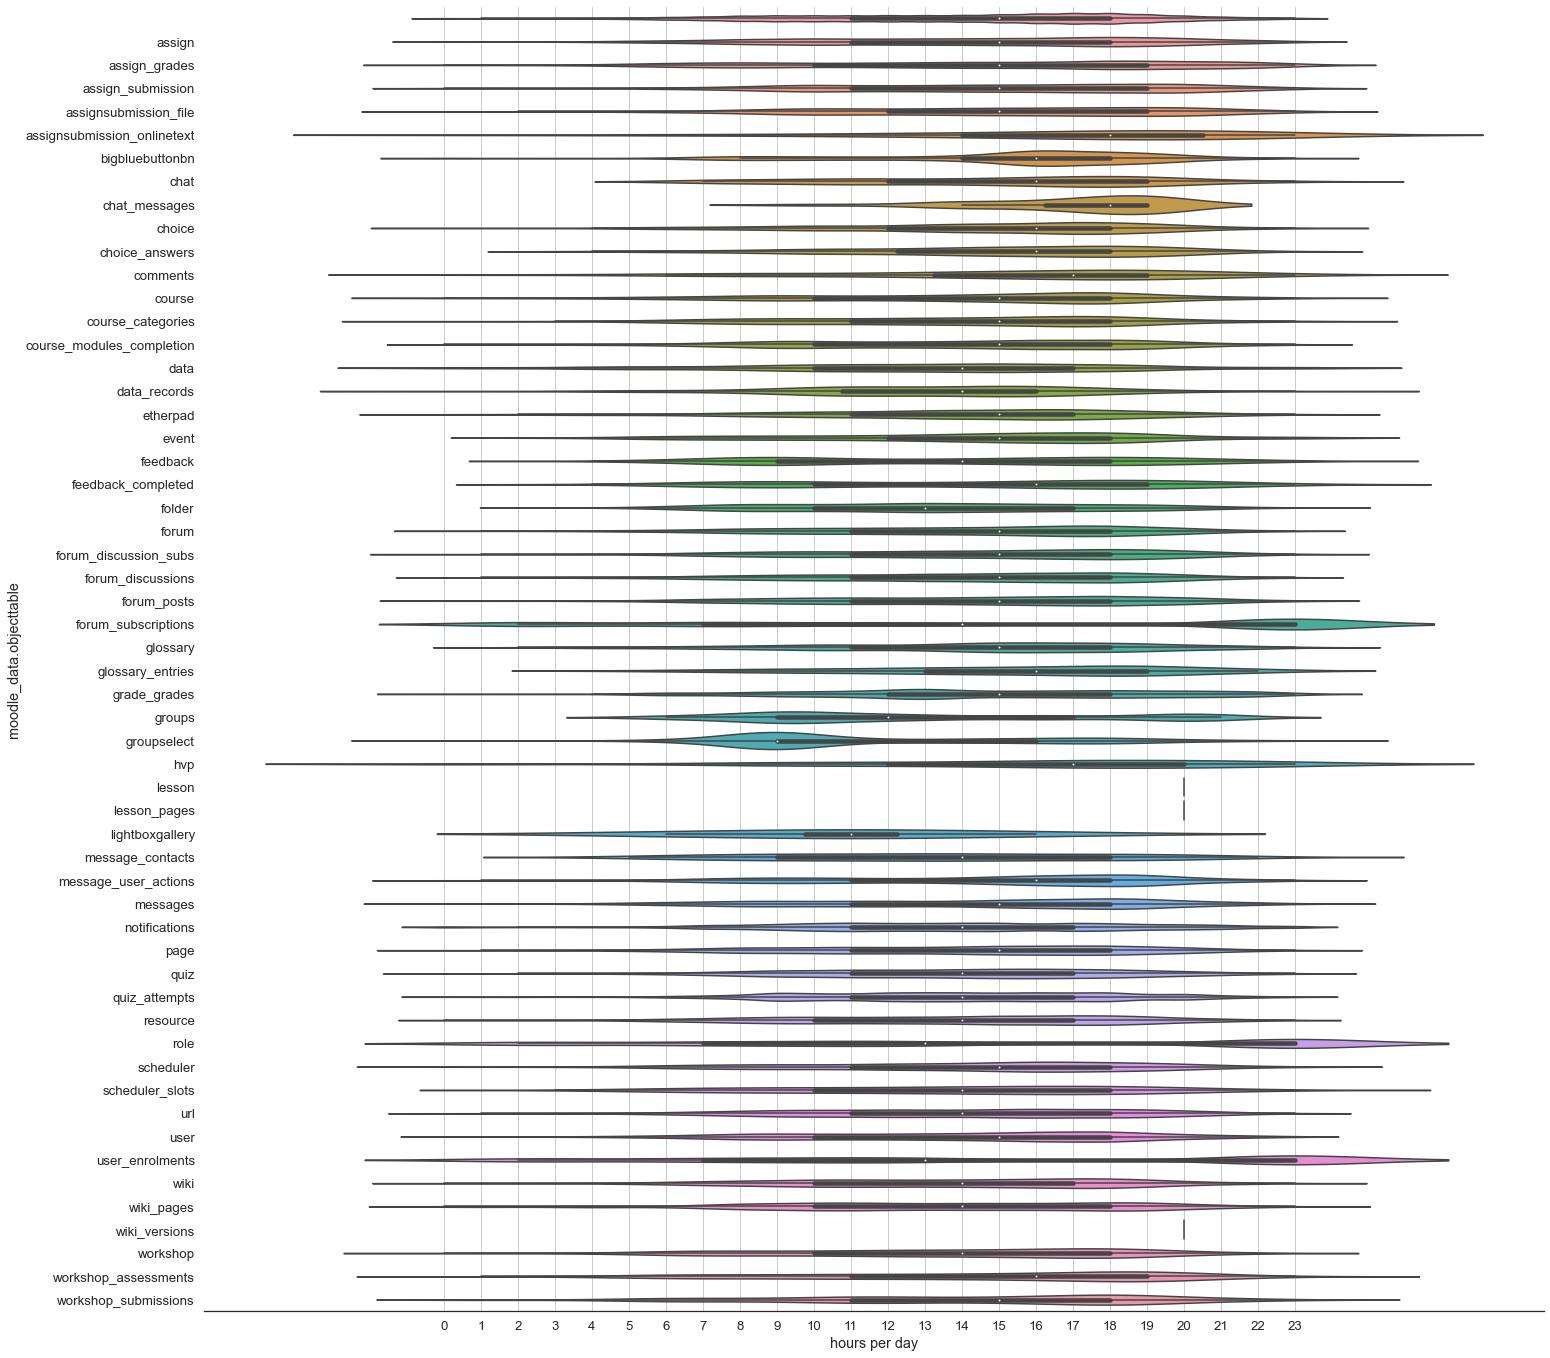

In [6455]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 24))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Objecttable über alle Tagesstunden
chart = sns.violinplot(x=hours_per_day, y=moodle_data.objecttable, orient='h', order=objecttables.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Objecttable und Studiengang über alle Tagesstunden**

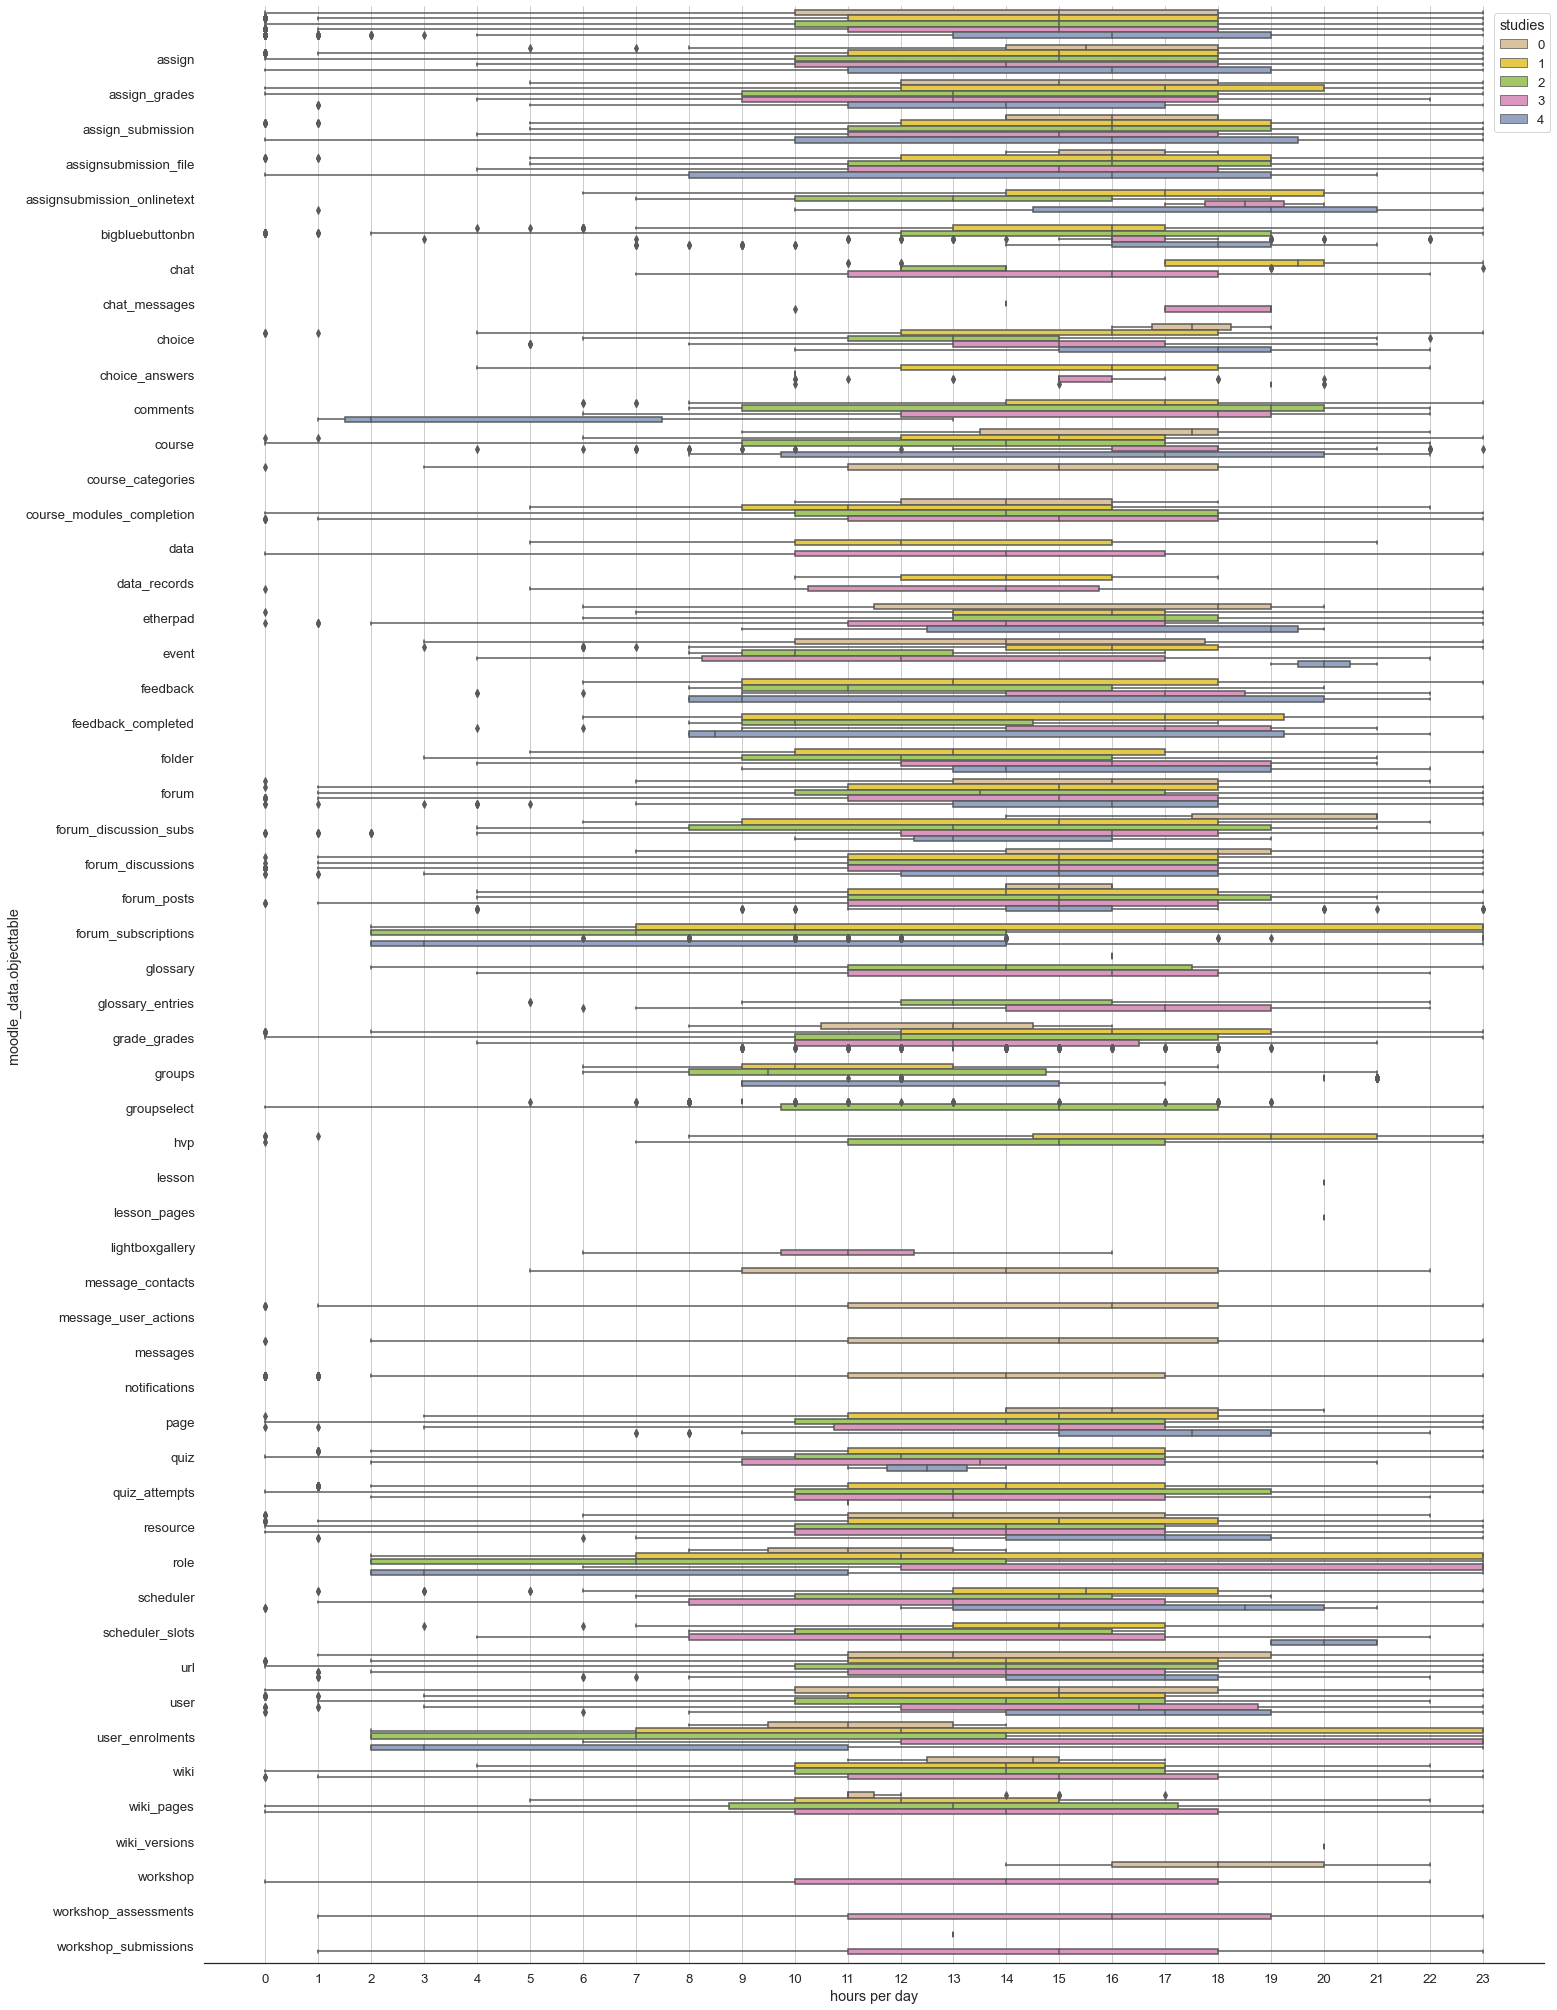

In [6456]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 36))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Objecttable und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.objecttable, orient='h', order=objecttables.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=hours_per_day, y=moodle_data.objecttable[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', order=objecttables.index, order=objecttables.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.01, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Objecttable über alle Wochentage**

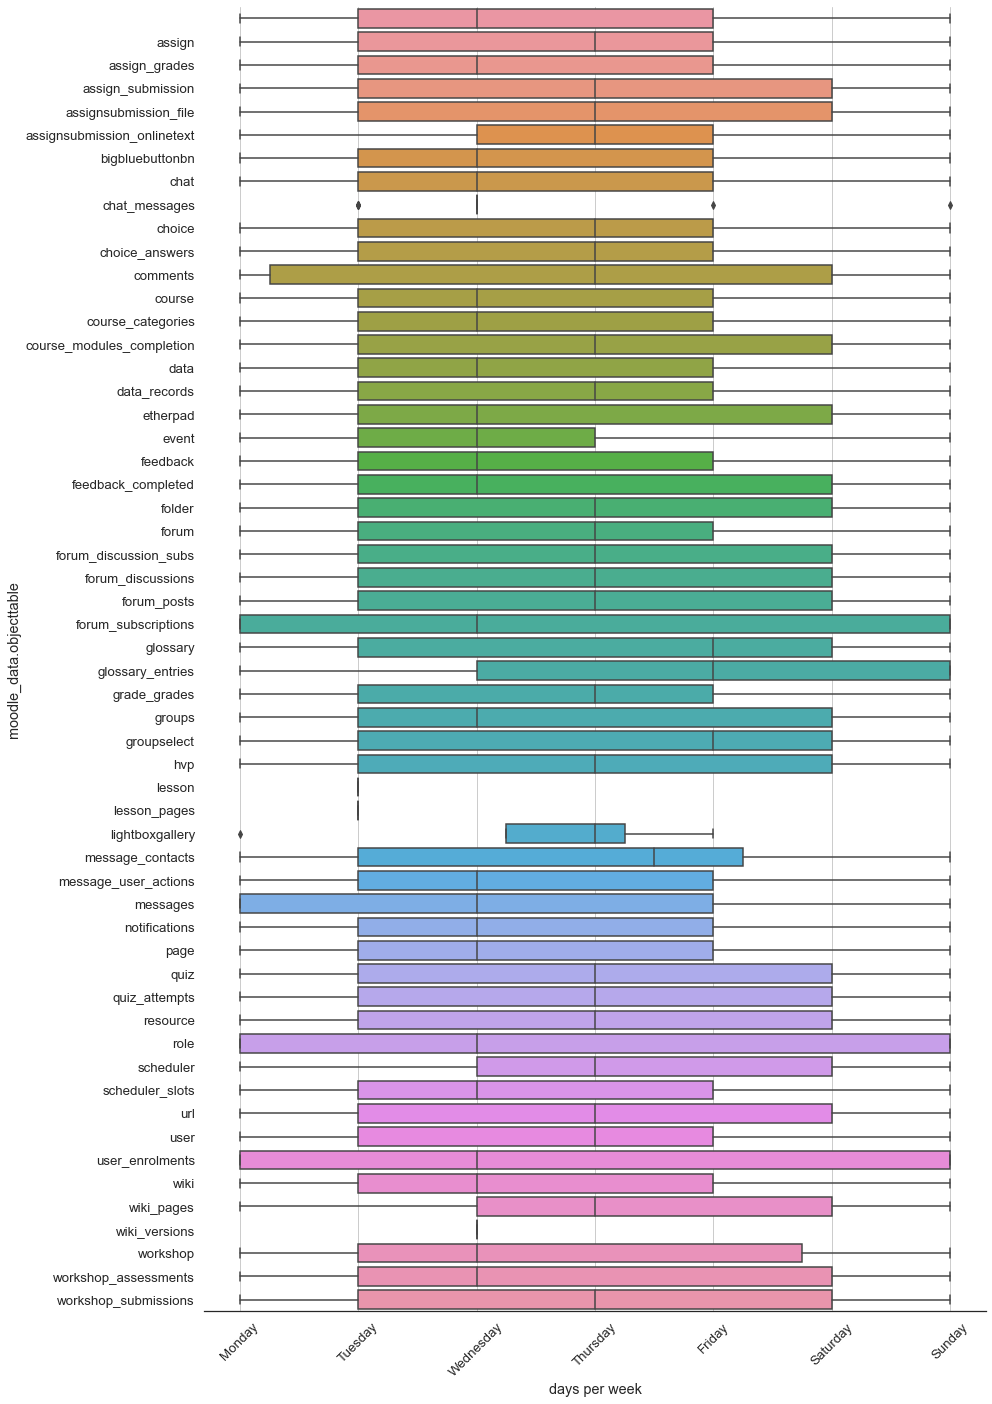

In [6457]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 24))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.objecttable, orient='h', order=objecttables.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

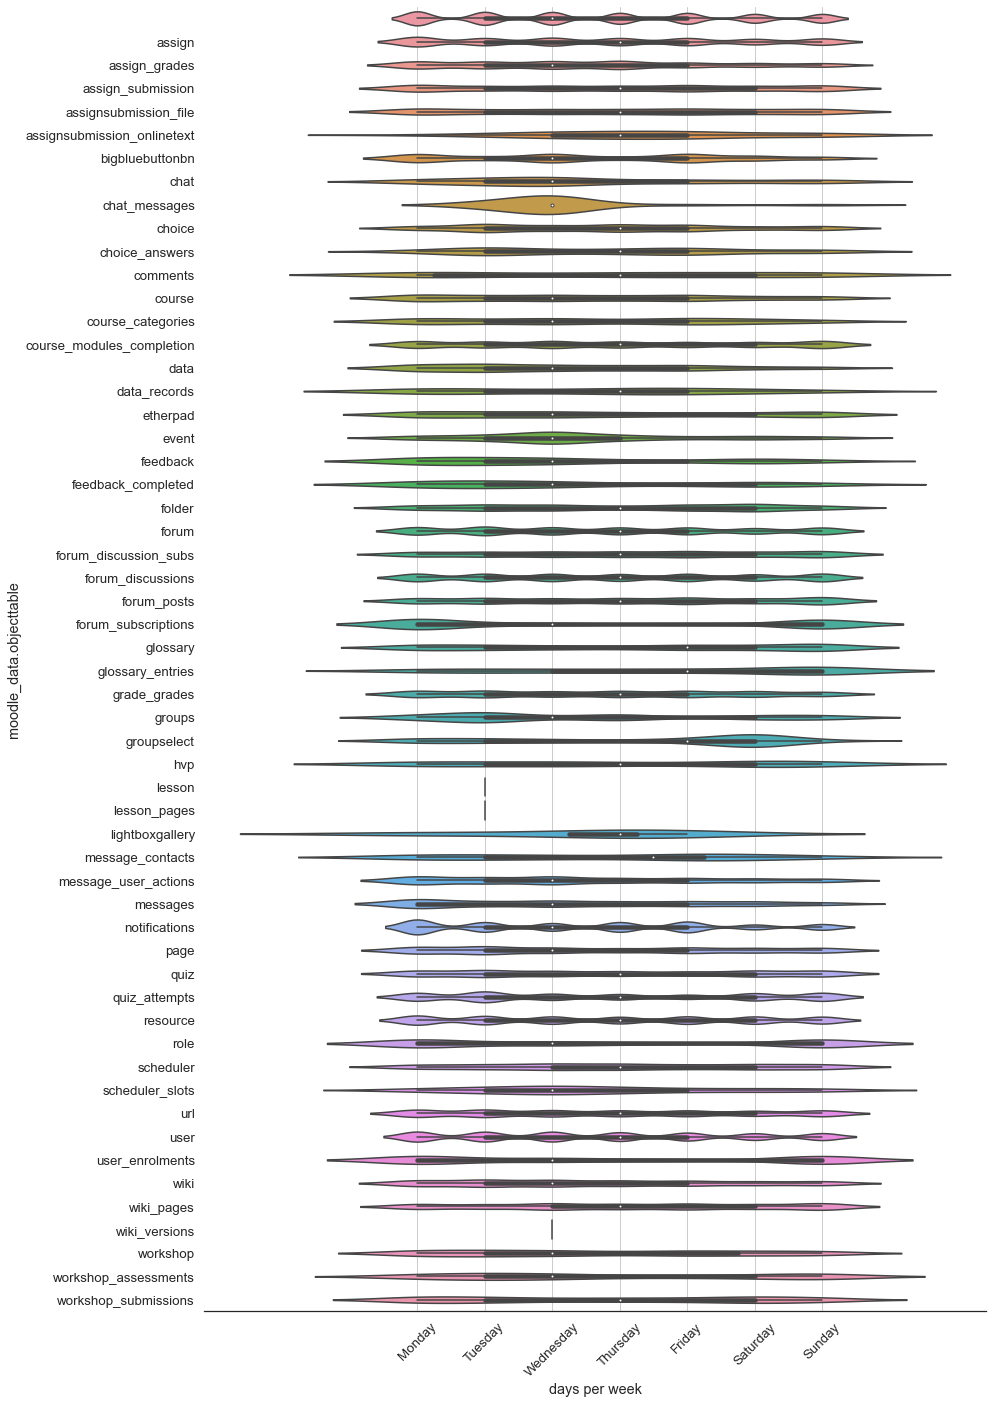

In [6458]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 24))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable über alle Wochentage
chart = sns.violinplot(x=days_per_week, y=moodle_data.objecttable, orient='h', order=objecttables.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Menge der Log-Einträge pro Objecttable und Studiengang über alle Wochentage**

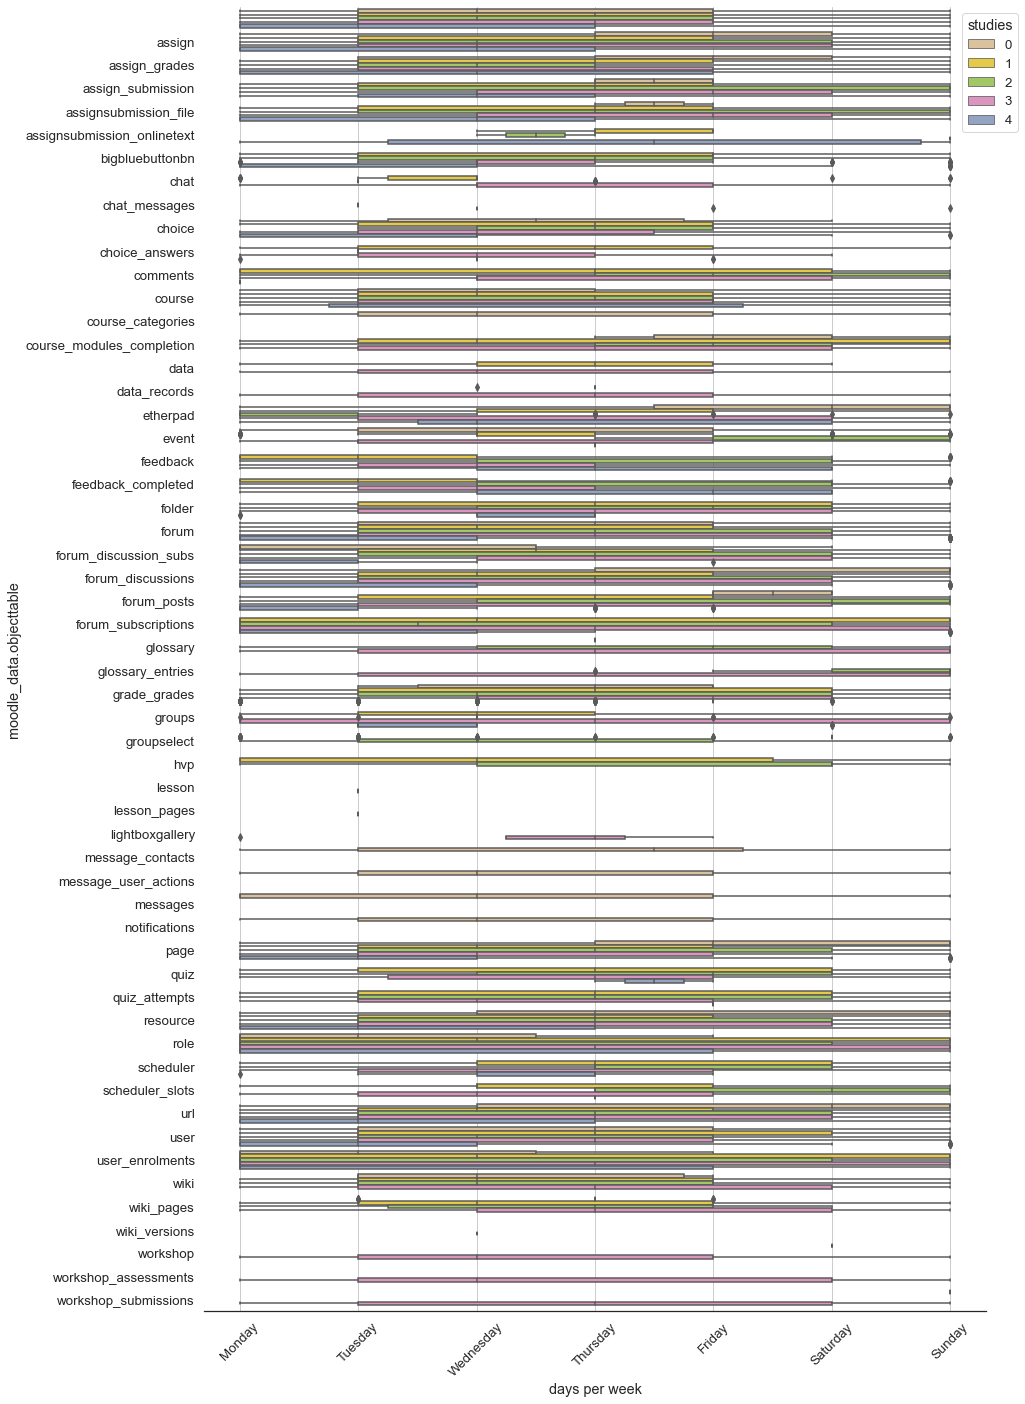

In [6459]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, 24))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.objecttable, orient='h', order=objecttables.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])
# nur für bestimmte Studiengänge
# chart = sns.boxplot(x=days_per_week, y=moodle_data.objecttable[moodle_data.Studiengang.astype(int).isin([0, 4])], orient='h', order=objecttables.index, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('moodle_data.objecttable')
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Verteilung der Log-Einträge pro Coursemoduletype

&nbsp;
**Log-Einträge pro Coursemoduletype**

In [6460]:
coursemoduletypes = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(coursemoduletypes)

course_module_type
         333385
s:54:       388
Name: course_module_type, dtype: int64

Es ist bemerkenswert, dass außer dem kryptischen Coursemoduletype **s:54:** keine weiteren im Datenbestand enthalten sind. Dies könnte als Indiz dafür gewertet werden, dass die Auswahl der Studenten erfolgreich war. Die Gegenprobe per SQL-Abfrage mit **SELECT userid, COUNT(*) AS 'total_number_records' FROM moodle_data WHERE !(course_module_type = '' OR course_module_type = 's:54:') GROUP BY userid;** zeigt aber nur 55 Treffer, d.h. es werden nicht alle potentiellen Nicht-Studenten erfasst.